# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
! pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 45.8 MB/s eta 0:00:00


## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 1000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

                                             |          | [  0%]   00:00 -> (? left)


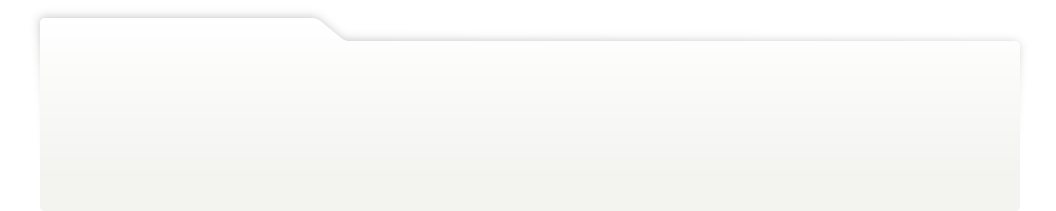
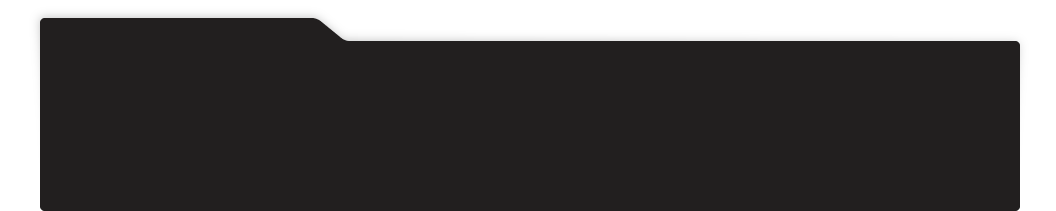
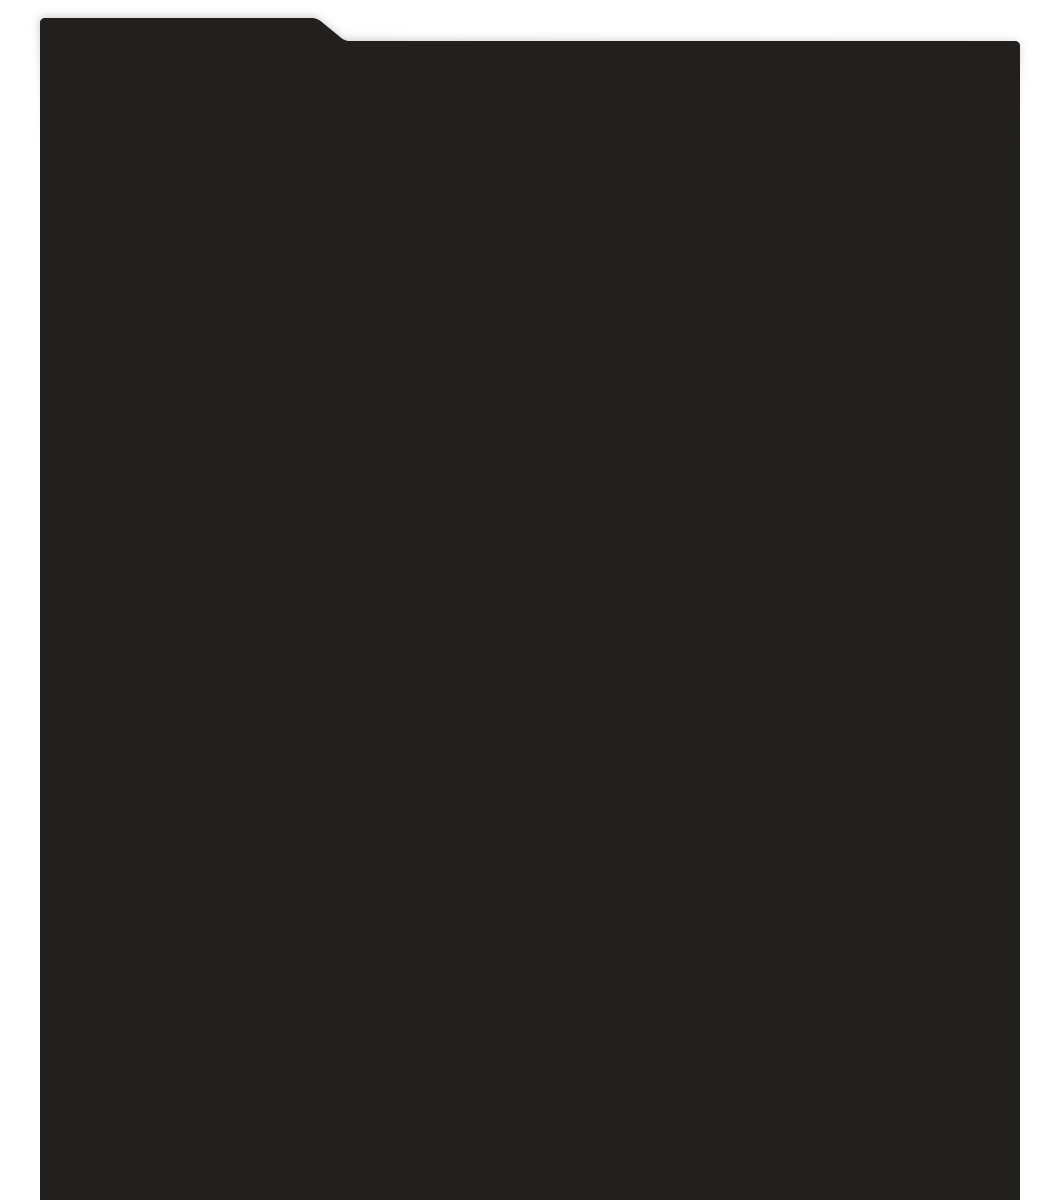
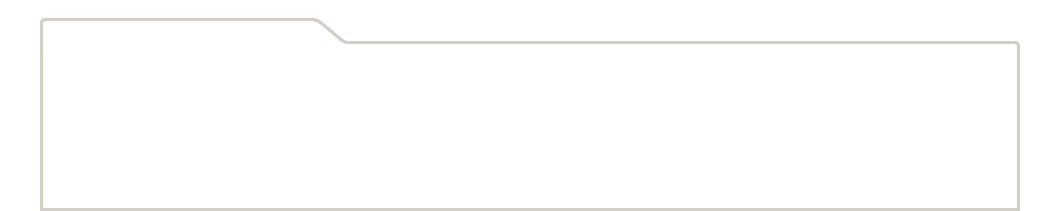
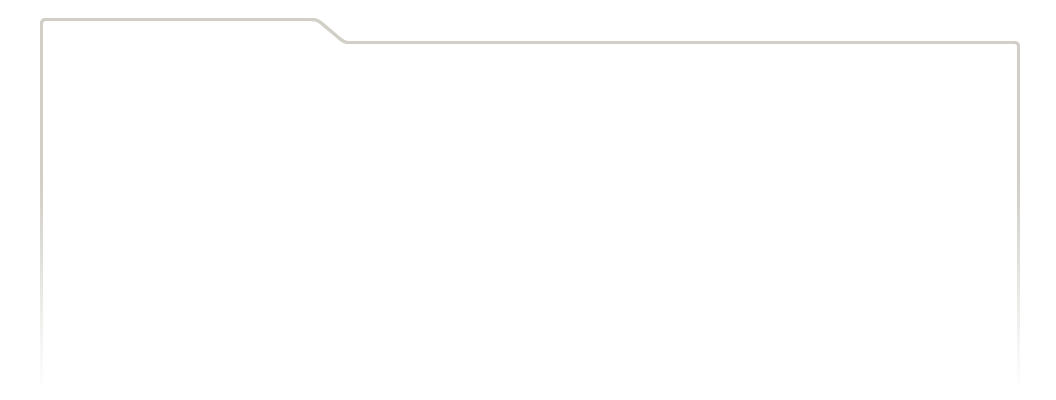
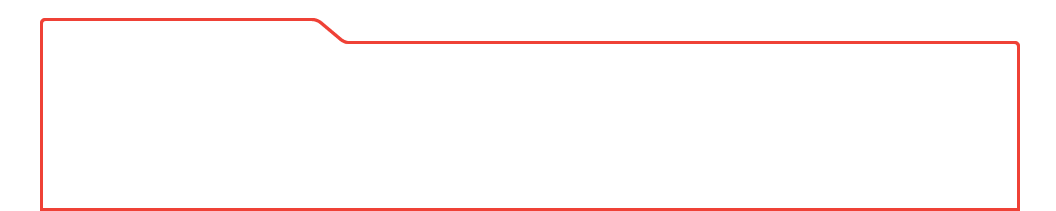
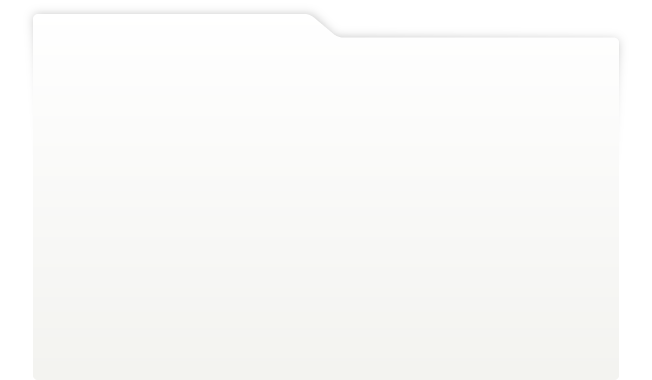
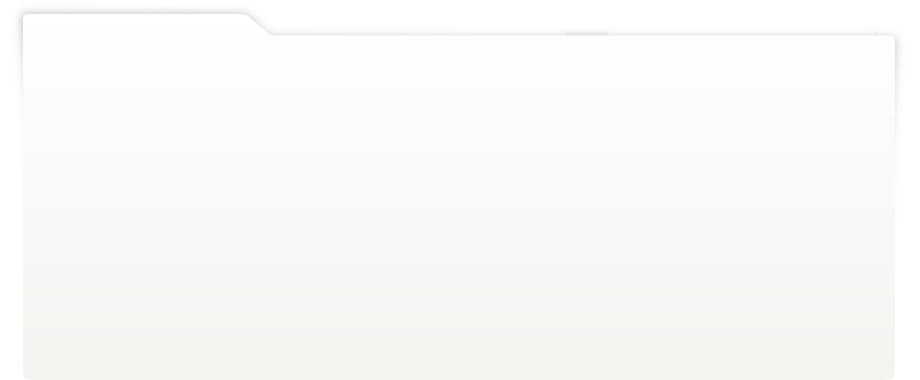
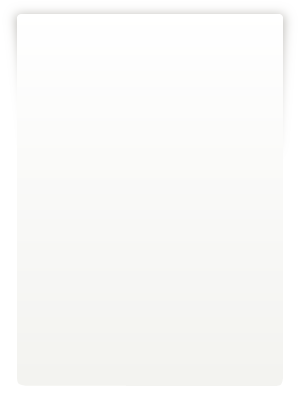
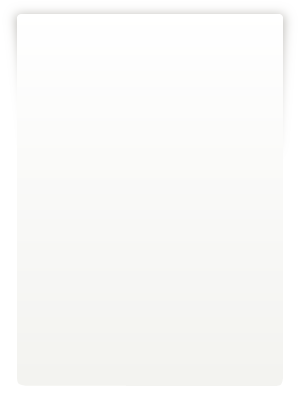
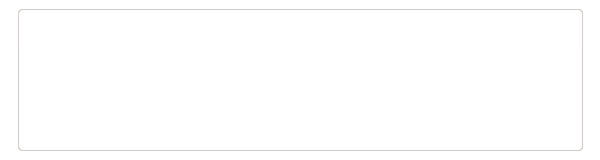
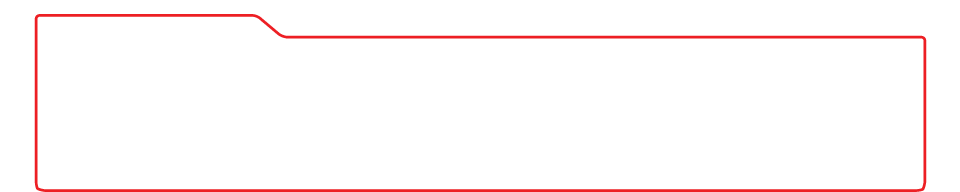
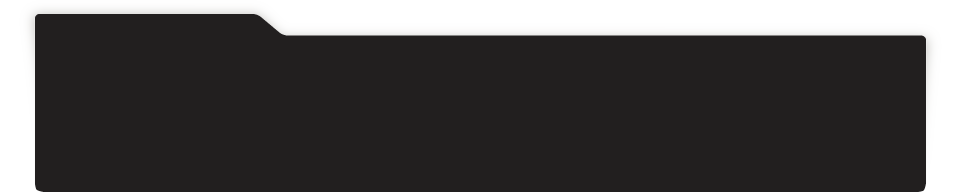
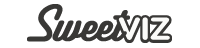
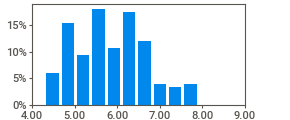
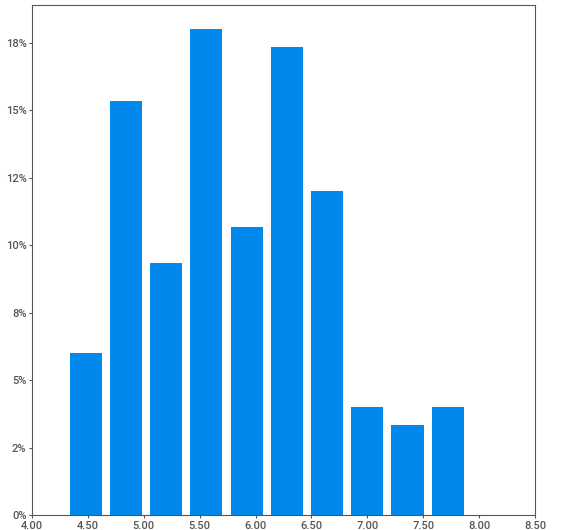
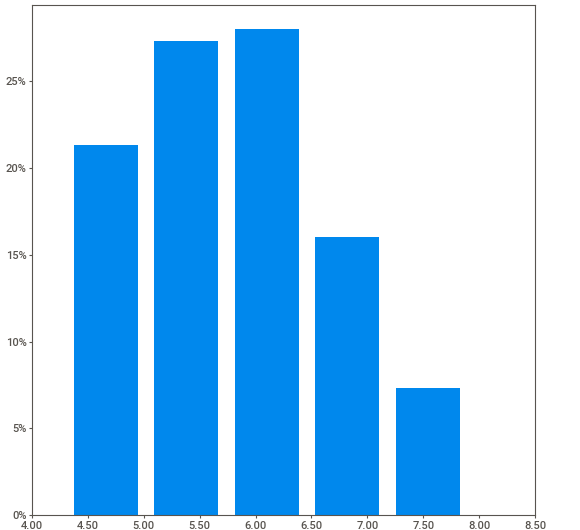
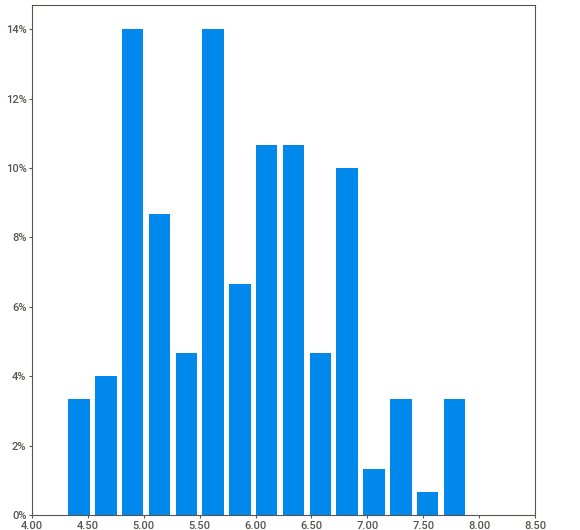
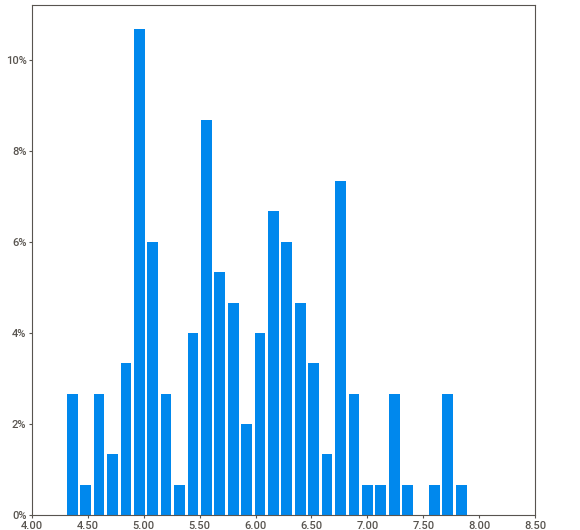
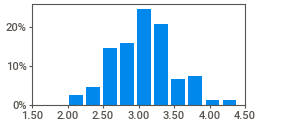
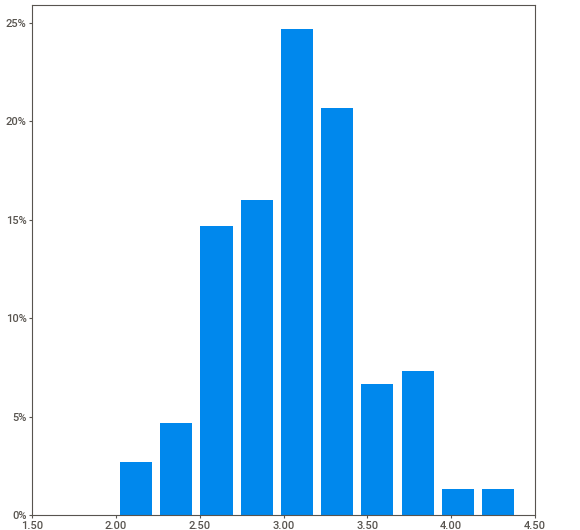
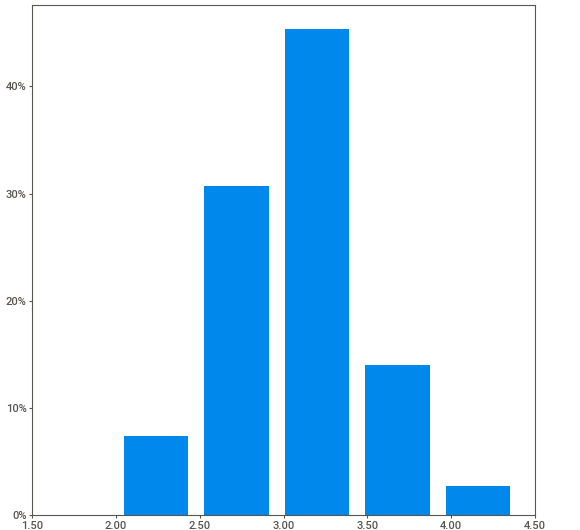
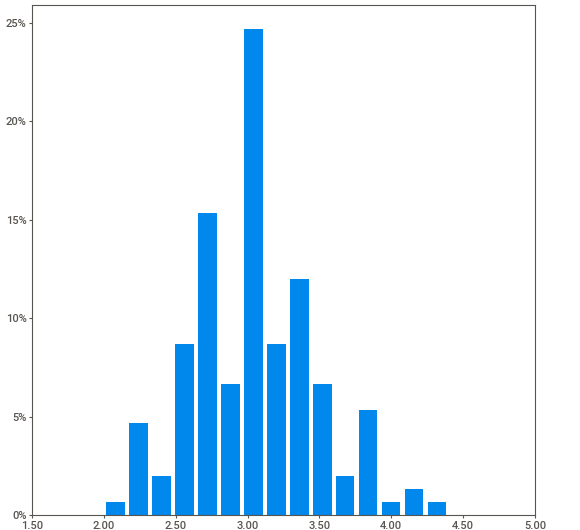
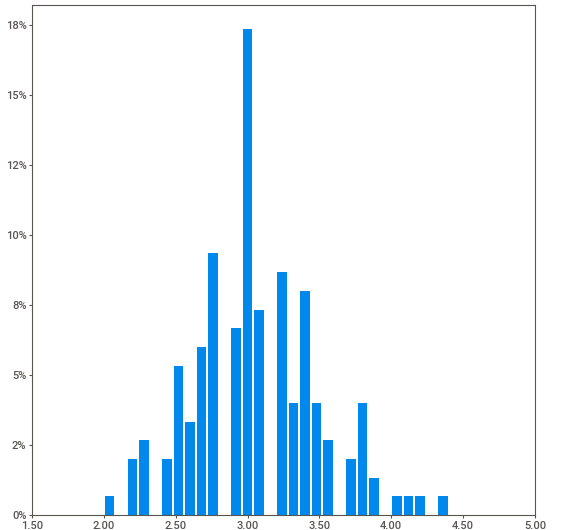
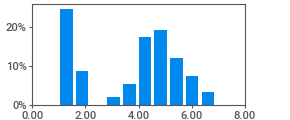
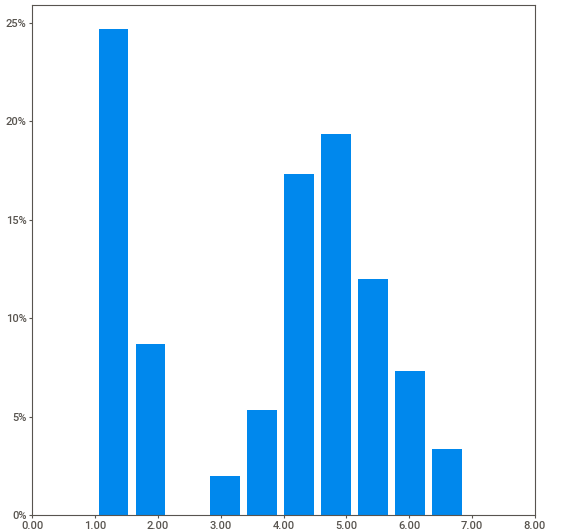
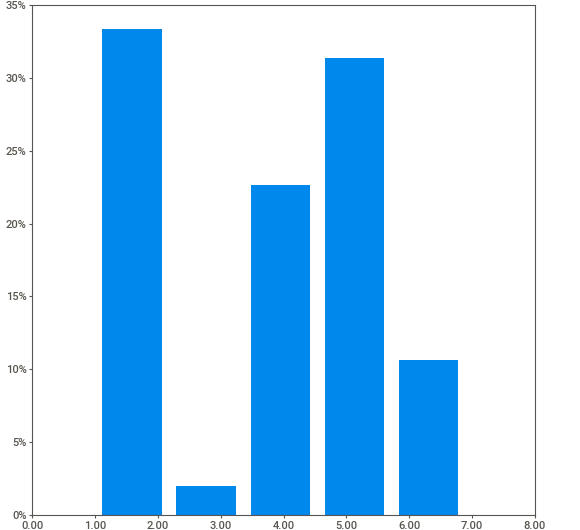
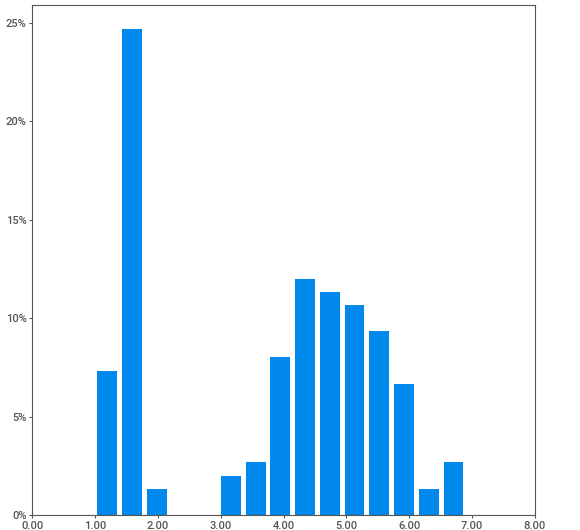
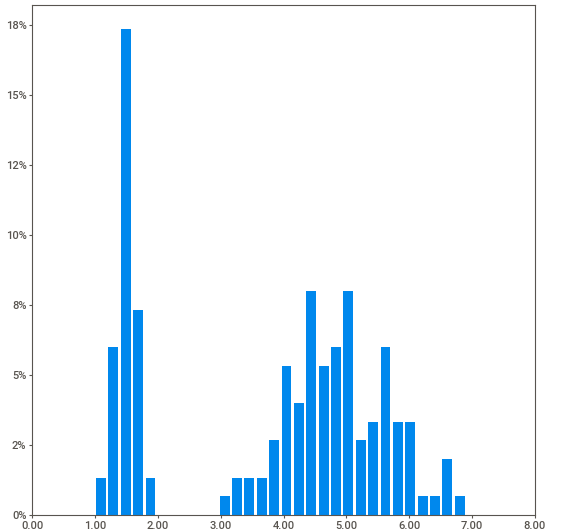
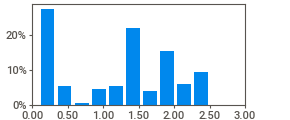
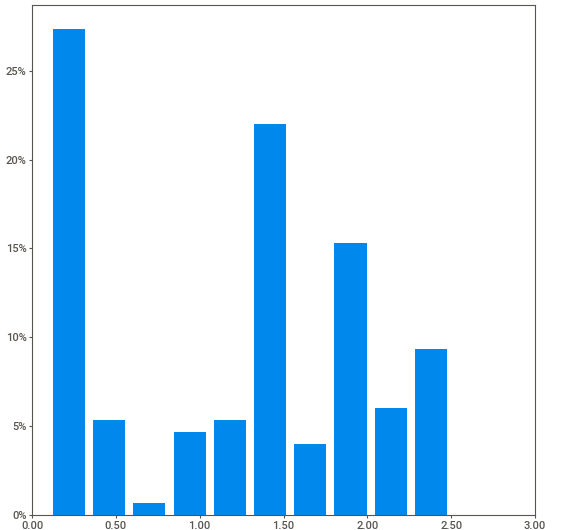
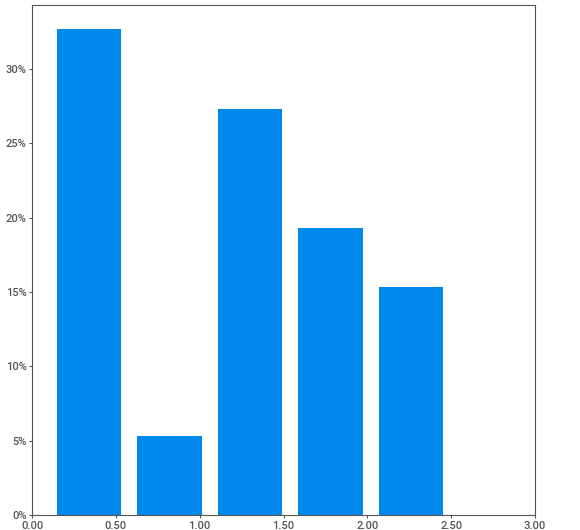
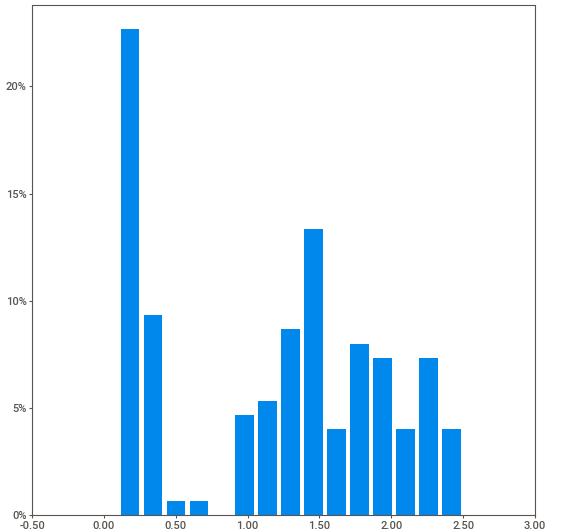
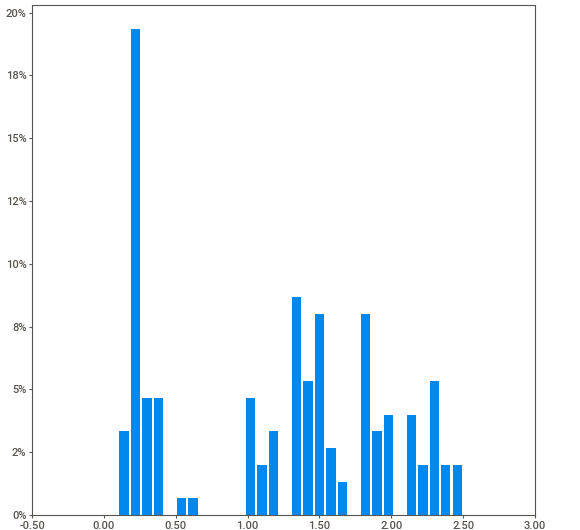
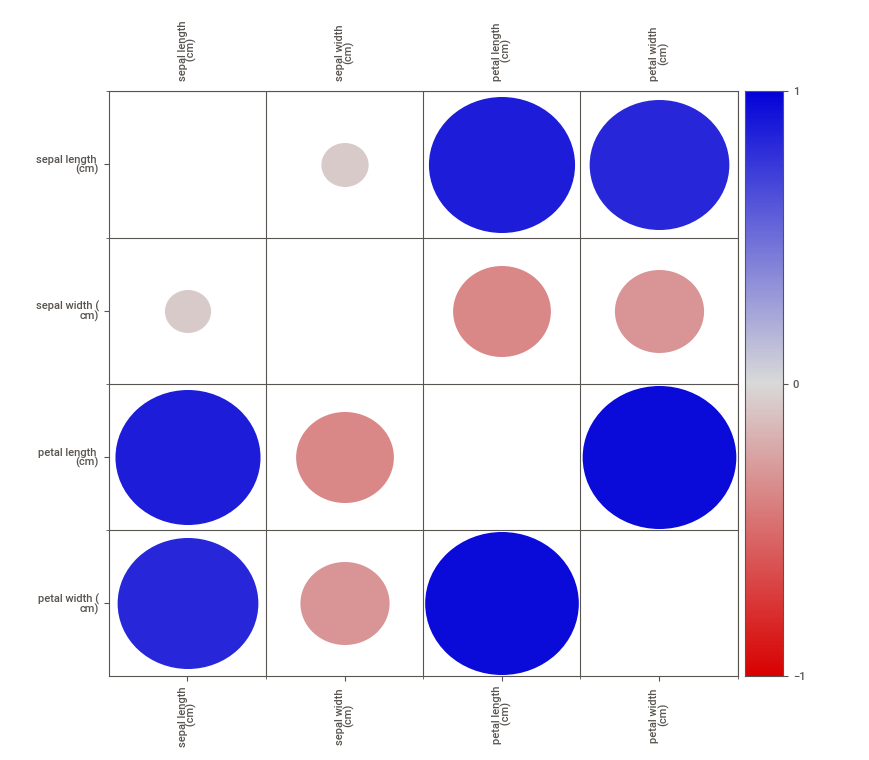
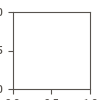

In [22]:
#Iris with no regularization
from sklearn import datasets
import sweetviz as sv
iris = datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
report = sv.analyze(iris_df)
report.show_notebook()

In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
def mlp_function(runs):
  runs = runs
  iter_count = 0
  accuracy_count = 0


  for i in range(runs):

    encoder = OneHotEncoder()
    iris_hot_targets = encoder.fit_transform(iris.target.reshape(-1, 1)).toarray()

    X_train,X_test, y_train, y_test = train_test_split(iris.data, iris_hot_targets, test_size=.2)

    MLP = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic', solver = 'sgd', alpha = 0, batch_size = 1,
                      learning_rate_init = 0.01, shuffle = True, momentum = 0,n_iter_no_change = 50, max_iter=1000)
    MLP.fit(X_train, y_train)

    iter_count += MLP.n_iter_
    accuracy_count += MLP.score(X_train,y_train)

    if i == 0:
      soft_max = MLP.predict_proba(X_test)

  avg_iter = iter_count/runs
  avg_accuracy = accuracy_count/runs

  print(f'Average Iterations: {avg_iter}')
  print(f'Average Accuracy: {avg_accuracy}')
  print(f'Soft Max Probability: {soft_max[0][0]}')

mlp_function(5)


Average Iterations: 331.0
Average Accuracy: 0.9766666666666666
Soft Max Probability: 1.2306015493000967e-07




```
# This is formatted as code
```

*Discussion*

I was a little suprised how often the model ran inorder to complete before it converged. I think that time did bring greater accuracy and the "Soft Max Probabilty" was extremely high, effectively 100%. So overall it seems slower but has higher accuracy for a complex data set compared with the single perceptron.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but his time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

Average Iterations: 108.66666666666667
Average Accuracy: 0.8527777777777779
Soft Max Probability: 0.9986693853440154
Best Validation Set: 1.0


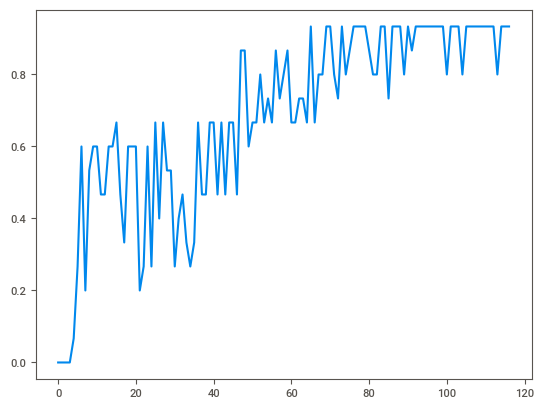

In [4]:
#Iris with early stopping and validation scores graph
def mlp_function_with_plot(runs):
  runs = runs
  iter_count = 0
  accuracy_count = 0


  for i in range(runs):

    encoder = OneHotEncoder()
    iris_hot_targets = encoder.fit_transform(iris.target.reshape(-1, 1)).toarray()

    X_train,X_test, y_train, y_test = train_test_split(iris.data, iris_hot_targets, test_size=.2)

    MLP = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic', solver = 'sgd', alpha = 0, batch_size = 1,
                      learning_rate_init = 0.01, shuffle = True, momentum = 0,n_iter_no_change = 50, max_iter=1000,
                        early_stopping=True, validation_fraction=.125)
    MLP.fit(X_train, y_train)

    iter_count += MLP.n_iter_
    accuracy_count += MLP.score(X_train,y_train)

    if i == 0:
      soft_max = MLP.predict_proba(X_test)
      X = range(MLP.n_iter_)
      y = MLP.validation_scores_
      plt.plot(X,y)

  avg_iter = iter_count/runs
  avg_accuracy = accuracy_count/runs

  print(f'Average Iterations: {avg_iter}')
  print(f'Average Accuracy: {avg_accuracy}')
  print(f'Soft Max Probability: {soft_max[0][0]}')
  print(f'Best Validation Set: {MLP.best_validation_score_}')

mlp_function_with_plot(3)

*Discussion of average values above and the validation score graph*

The average iterations is way down, like almost a third of what they were the first time. The average accuracy is down about 10% and the Soft Max Probability is up by a lot.

My validation graph shows that the first couple of epochs have fairly low scores, but then it has a hug spike. It then plateaus at a score with various dips (Note: those dips never approach the original low scores) but those dips always return to the plateau level.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

Average Iterations: 274.0
Average Accuracy (Training): 0.9694444444444444
Soft Max Probability (Test Accuracy): 0.001440634697456246
Best loss value: 0.1603873750571389


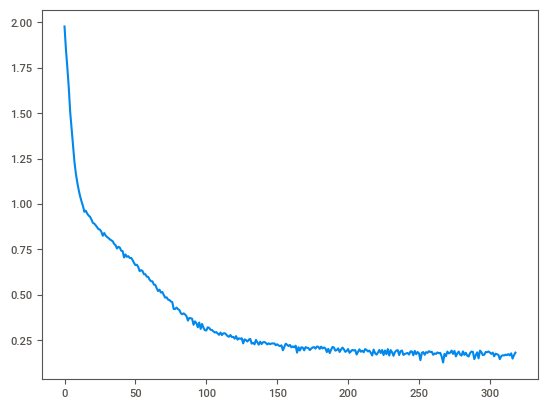

In [5]:
#Iris with Loss Regularization
def mlp_function_alpha(runs):
  runs = runs
  iter_count = 0
  accuracy_count = 0


  for i in range(runs):

    encoder = OneHotEncoder()
    iris_hot_targets = encoder.fit_transform(iris.target.reshape(-1, 1)).toarray()

    X_train,X_test, y_train, y_test = train_test_split(iris.data, iris_hot_targets, test_size=.2)

    MLP = MLPClassifier(hidden_layer_sizes = [64], activation = 'logistic', solver = 'sgd', alpha = 0.0001, batch_size = 1,
                      learning_rate_init = 0.01, shuffle = True, momentum = 0,n_iter_no_change = 50, max_iter=1000)
    MLP.fit(X_train, y_train)

    iter_count += MLP.n_iter_
    accuracy_count += MLP.score(X_train,y_train)

    if i == 0:
      soft_max = MLP.predict_proba(X_test)
      X = range(MLP.n_iter_)
      y = MLP.loss_curve_
      plt.plot(X,y)

  avg_iter = iter_count/runs
  avg_accuracy = accuracy_count/runs

  print(f'Average Iterations: {avg_iter}')
  print(f'Average Accuracy (Training): {avg_accuracy}')
  print(f'Soft Max Probability (Test Accuracy): {soft_max[0][0]}')
  print(f'Best loss value: {MLP.best_loss_}')

mlp_function_alpha(3)

|Reg Value|# of Iterations|Training|Test|Best Loss Value|
|---|---|---|---|---|
|.1|155.33|.575|0.11287322582329888|1.631415871242013|
|.01|305.33|0.975|0.014499794633869105|0.7958598856416698|
|.001|294|0.9694444444444444|0.9964472202403787|0.2506252599722725|
|.0001|310.67|.975|0.0019536770480925187|0.1777515250440711|

*Discussion and comparison between no regularization, early stopping and loss regularization*

I noticed that our iterations seemed to hover around 300 with this last set. I started with a larger alpha and its average epoch was about 150, and as we got incrementally smaller, the number of epochs remained fairly similar.

The test accuray seemed to do significantly better at .001 for the alpha values. The training data was pretty consistent with the number of interations, so the training accuracy seemed to stay pretty consistent with anything lower than an alpha value of .01.

The Loss Values got lower as the alpha value decreased. So pretty correlated with the alpha value with this dataset.

So when I compare all three functions, notice that the no regulariation does Soft Max Probabilty really well while the early stopping got really high validation scores, and the loss regularization had really good training accuracy the lower the alpha value became.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great example for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

                                             |          | [  0%]   00:00 -> (? left)


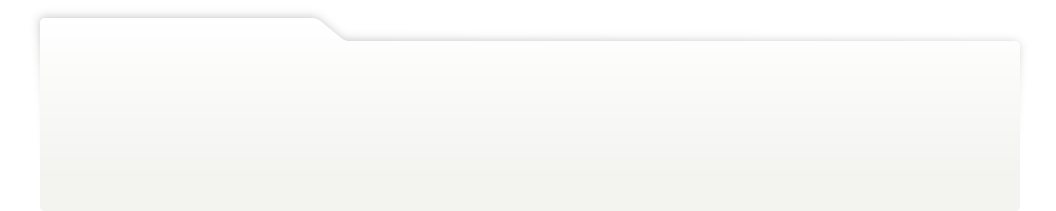
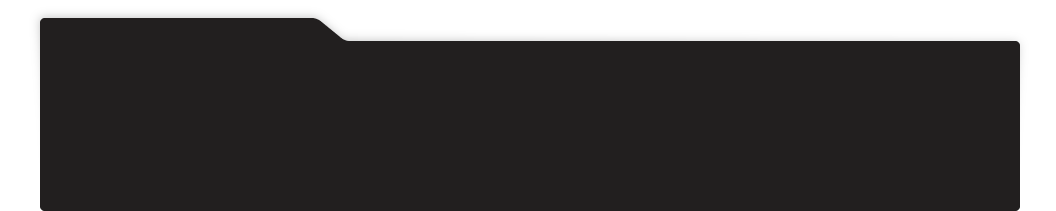
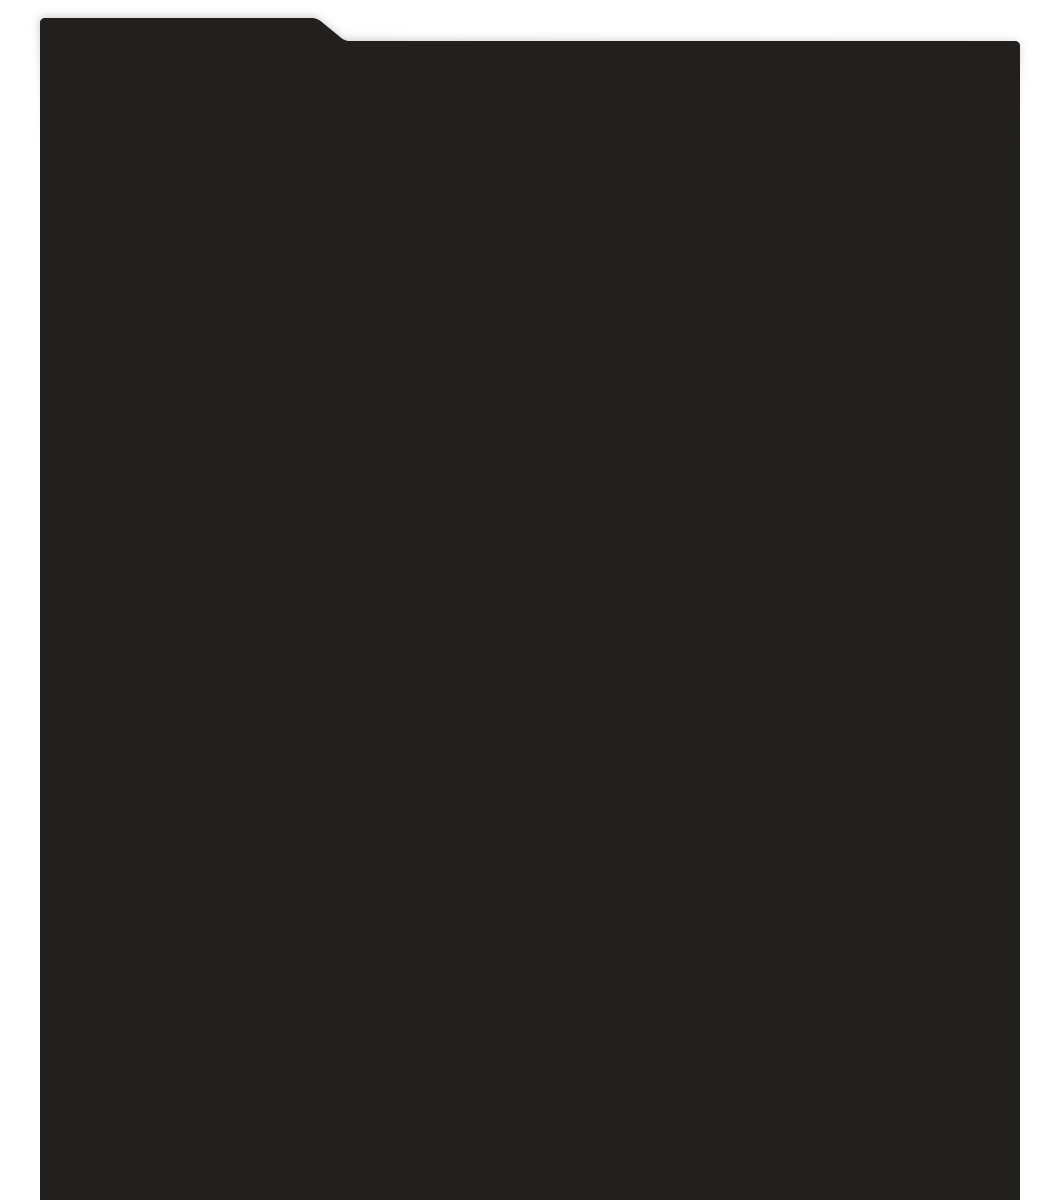
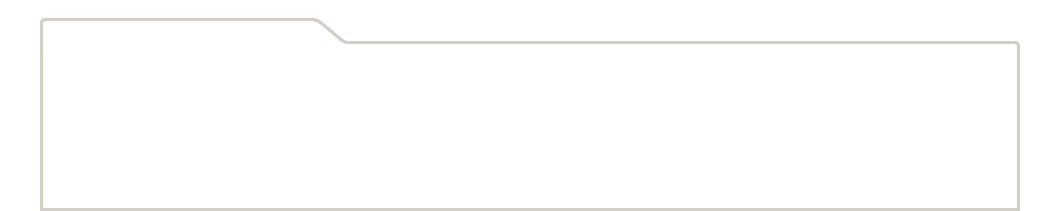
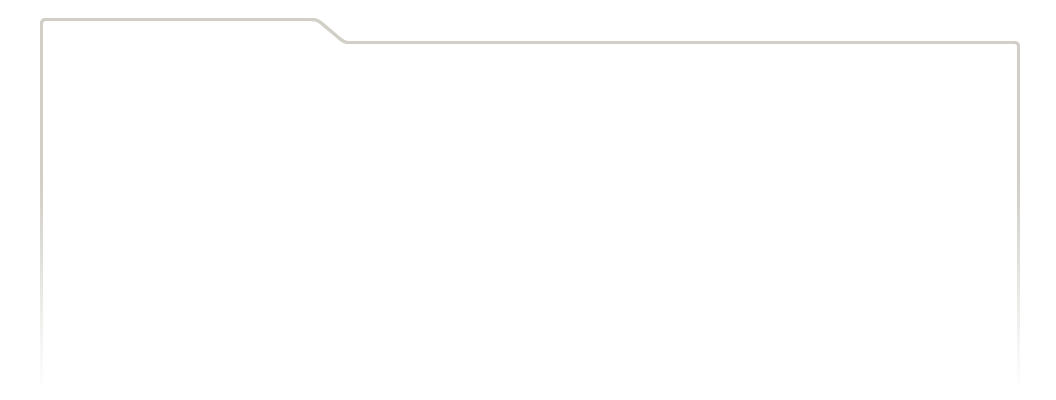
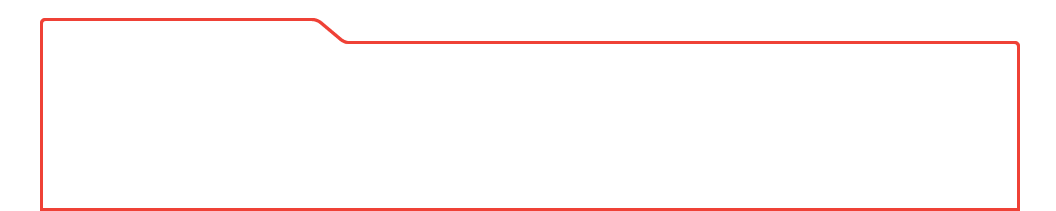
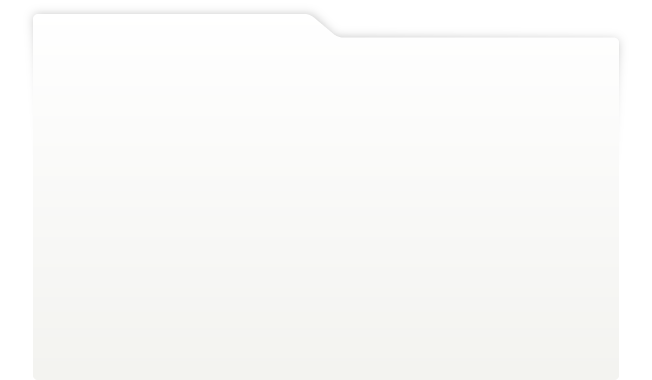
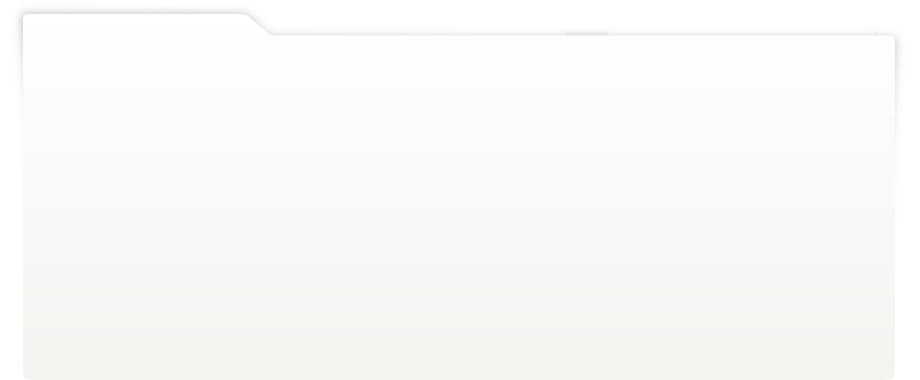
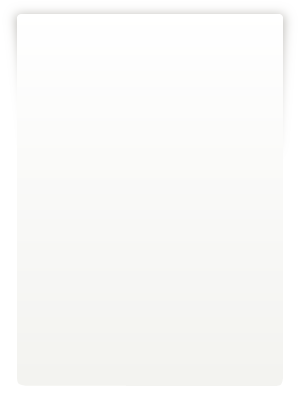
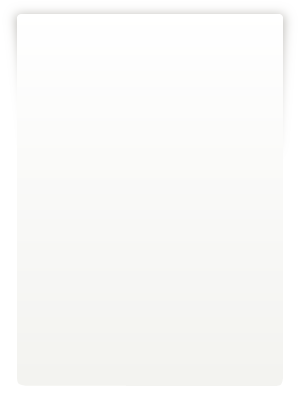
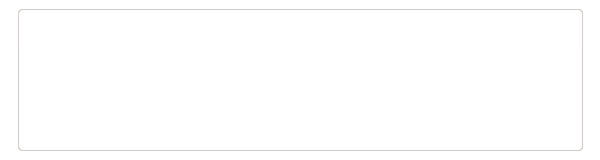
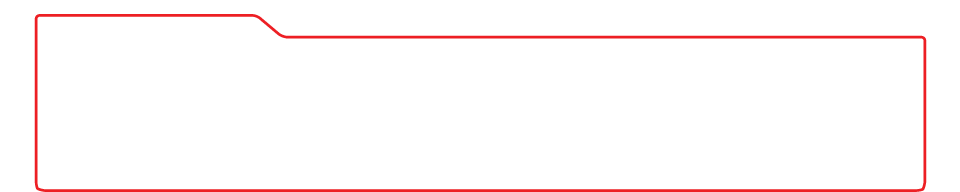
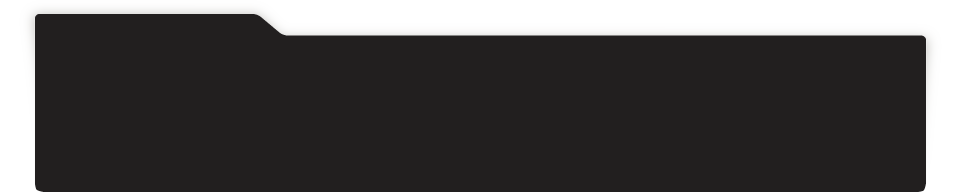
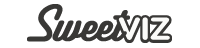
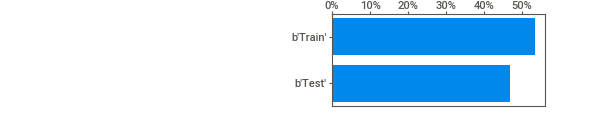
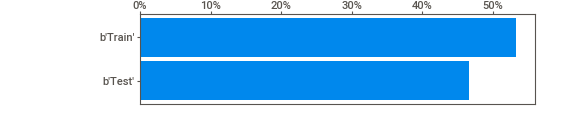
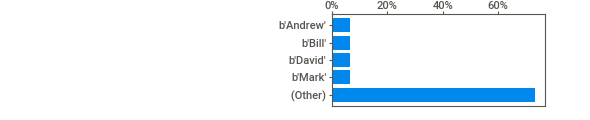
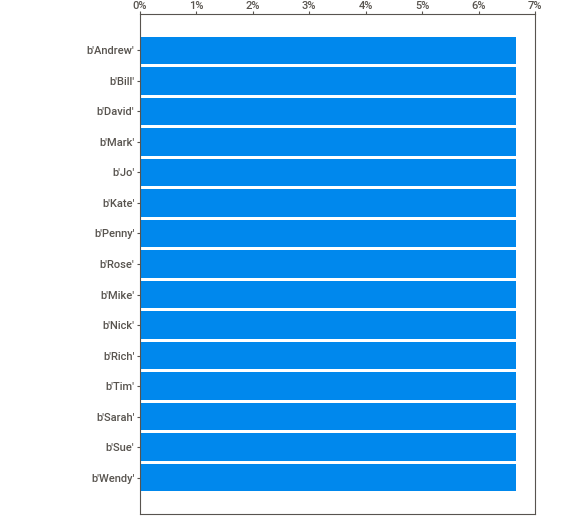
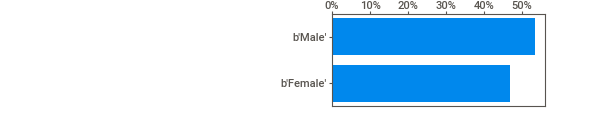
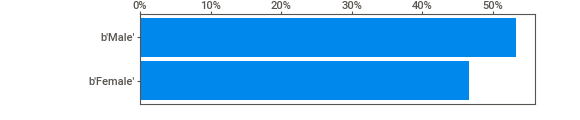
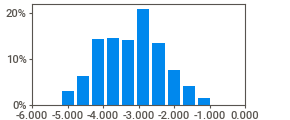
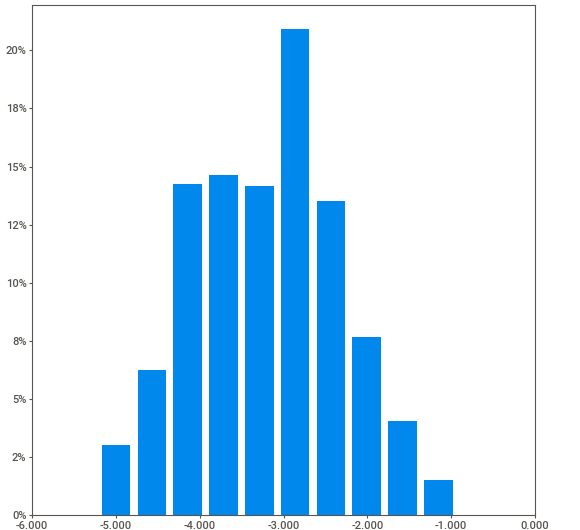
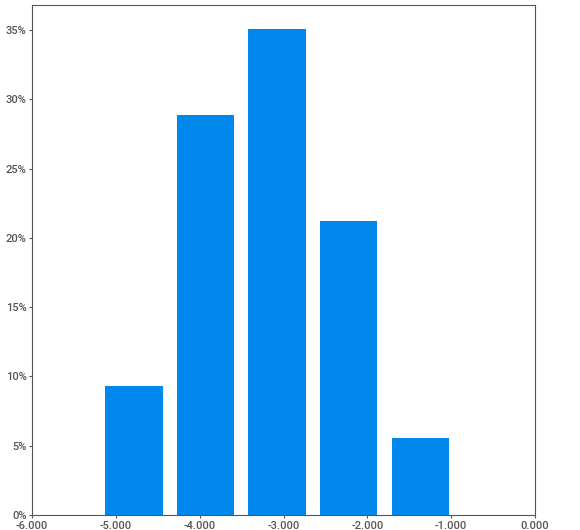
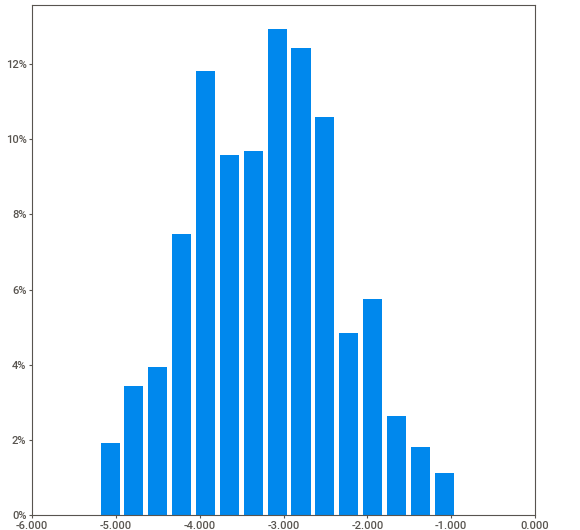
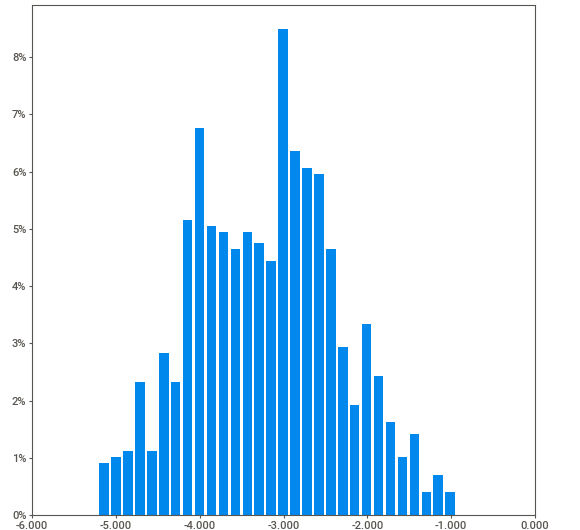
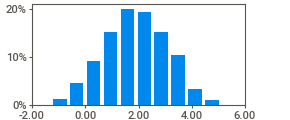
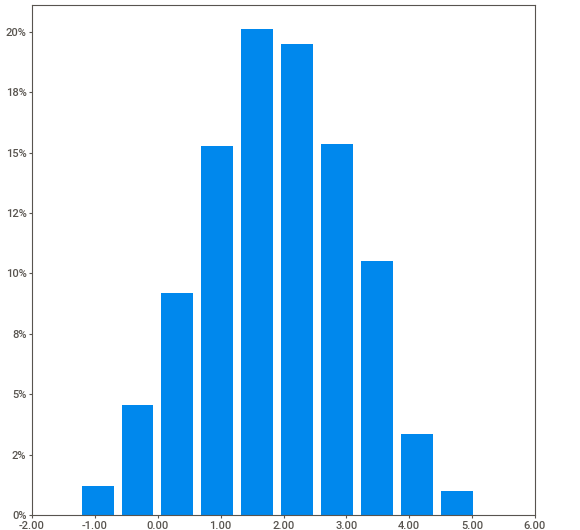
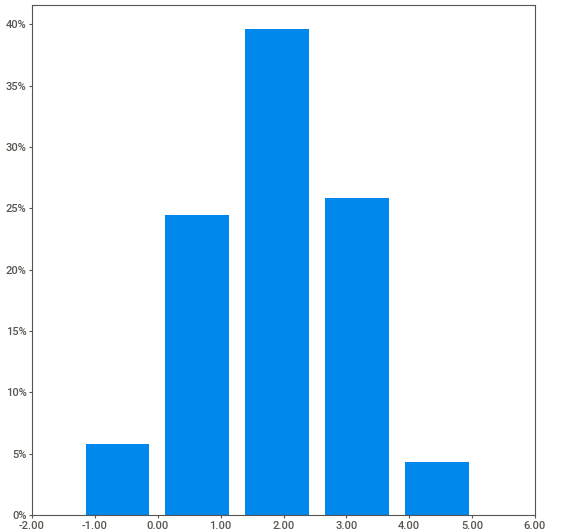
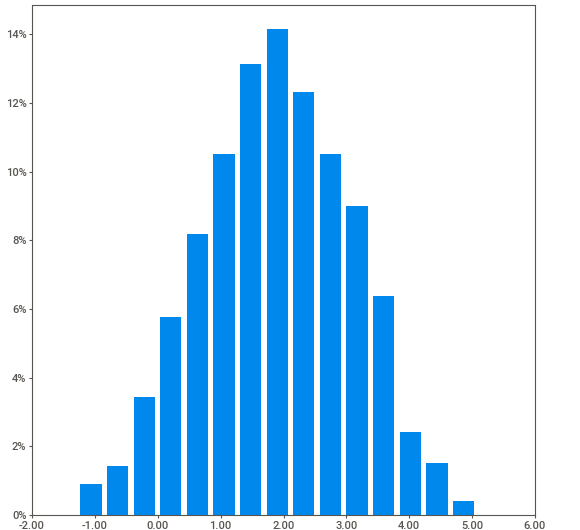
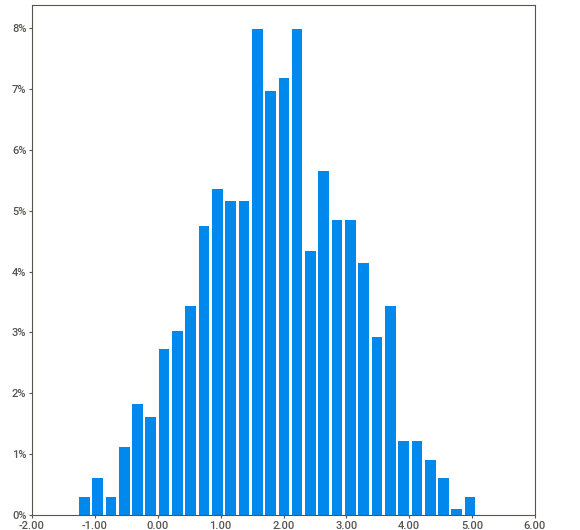
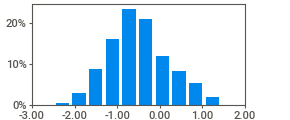
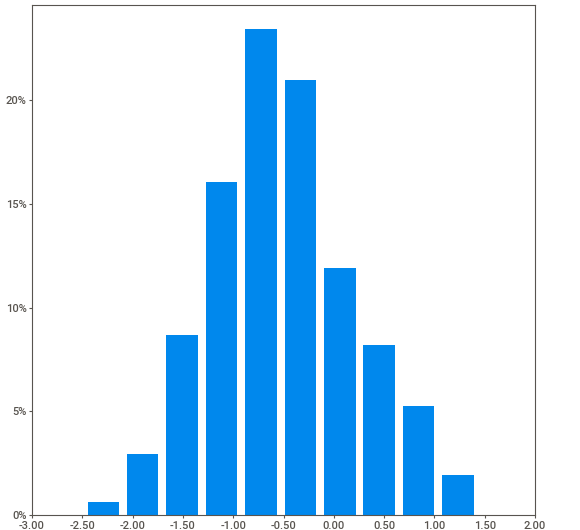
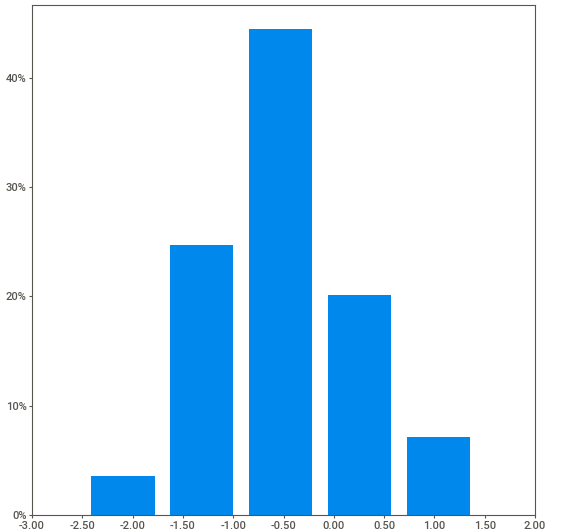
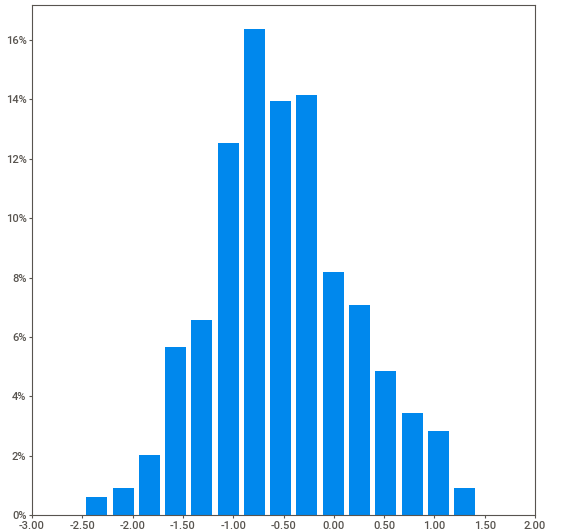
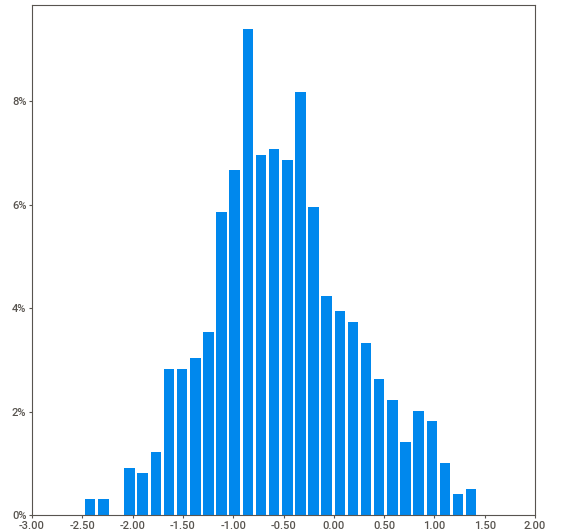
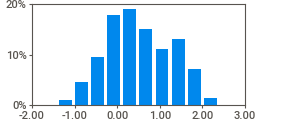
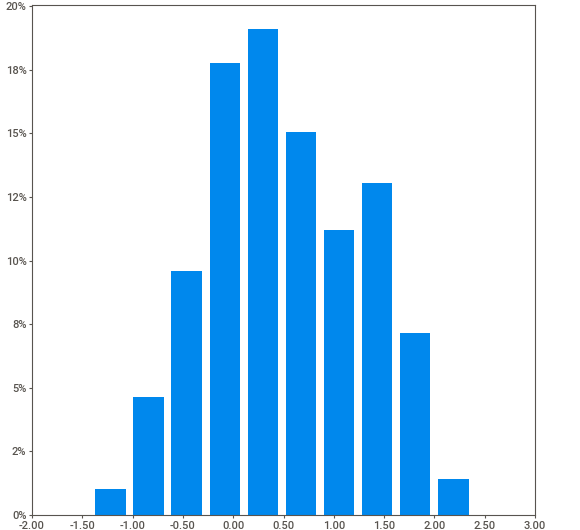
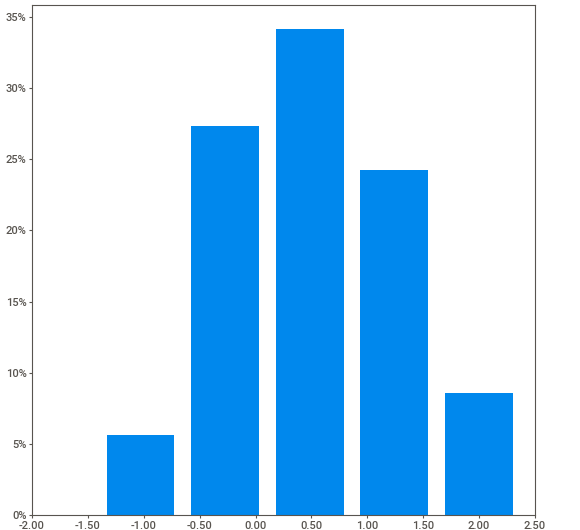
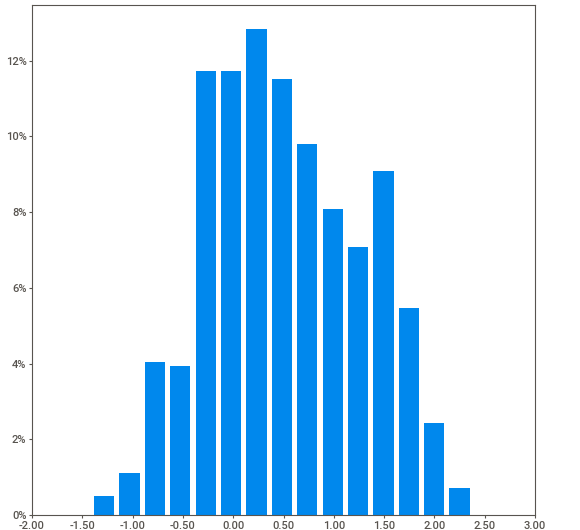
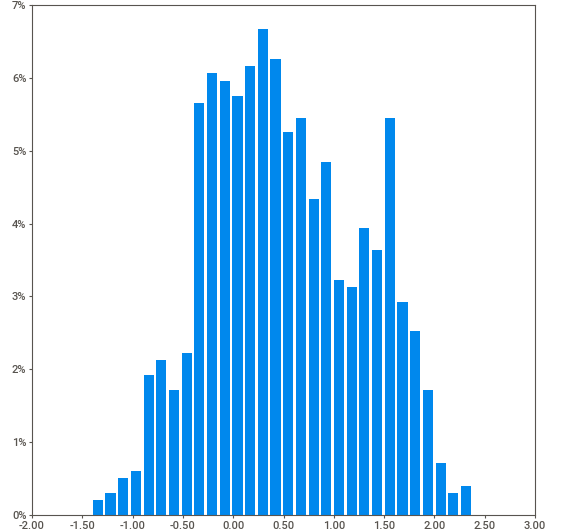
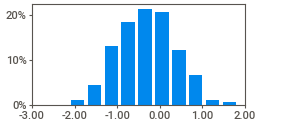
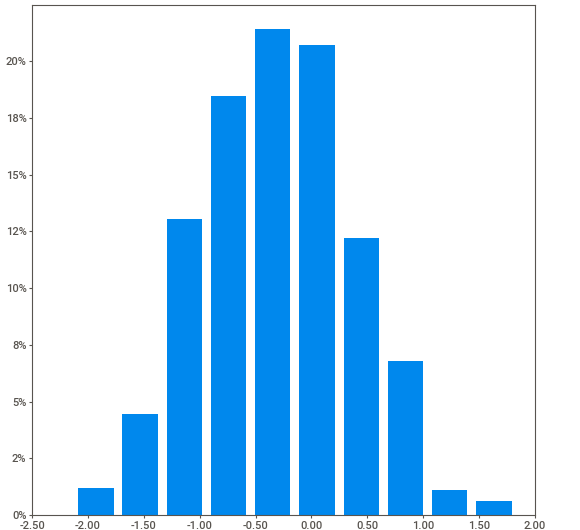
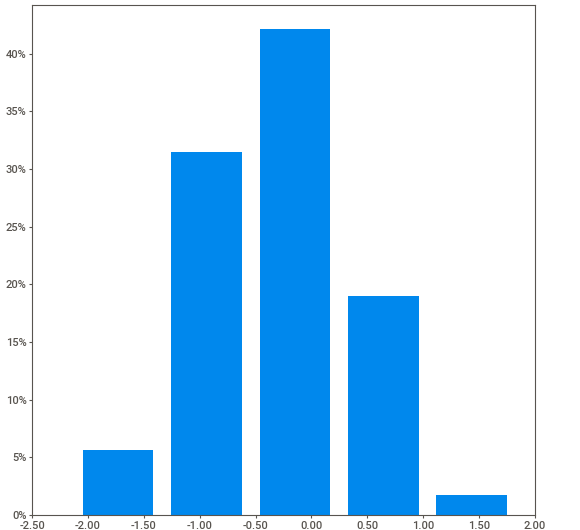
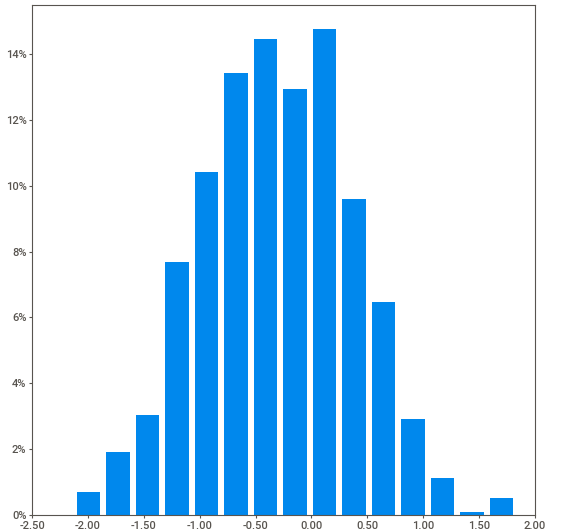
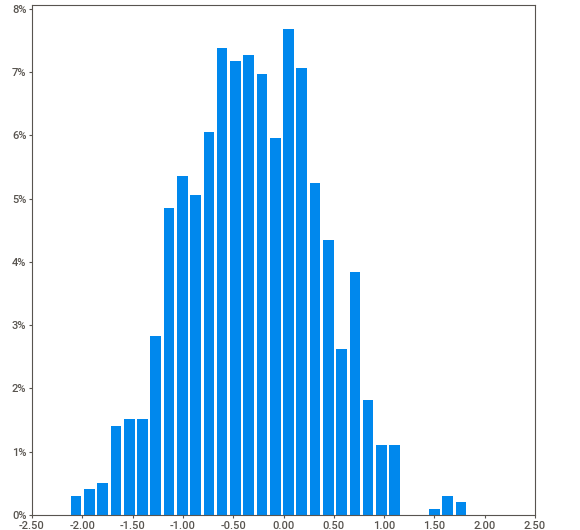
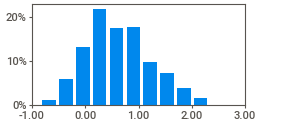
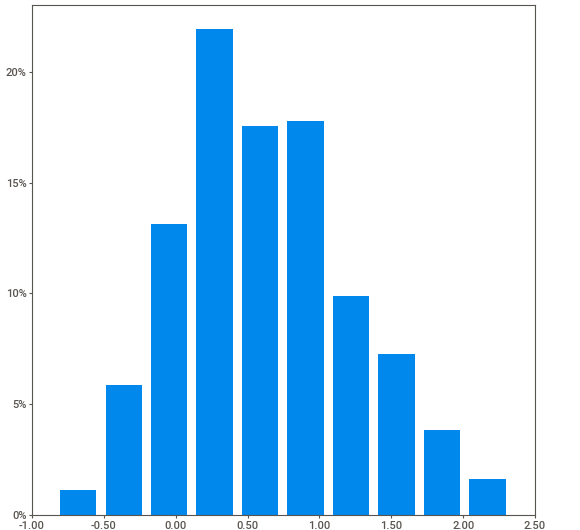
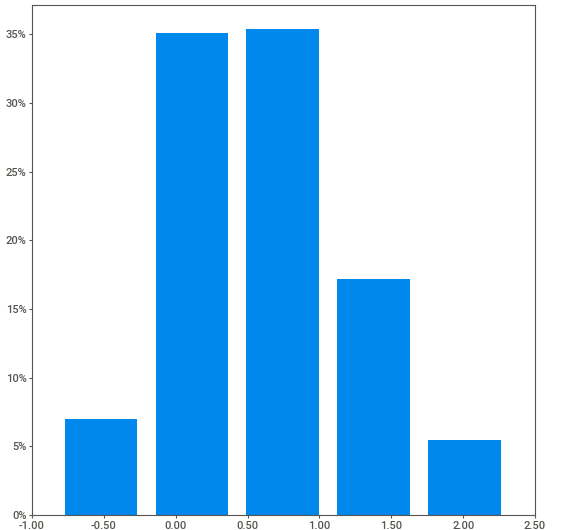
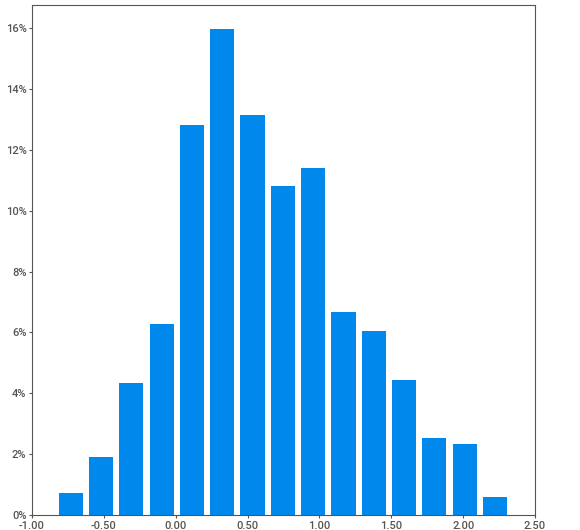
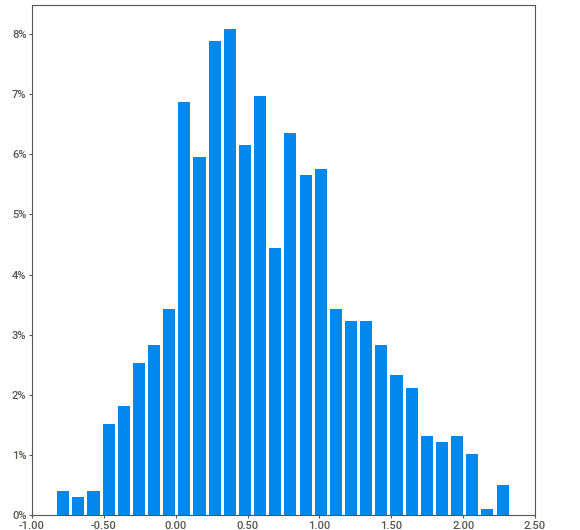
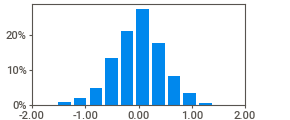
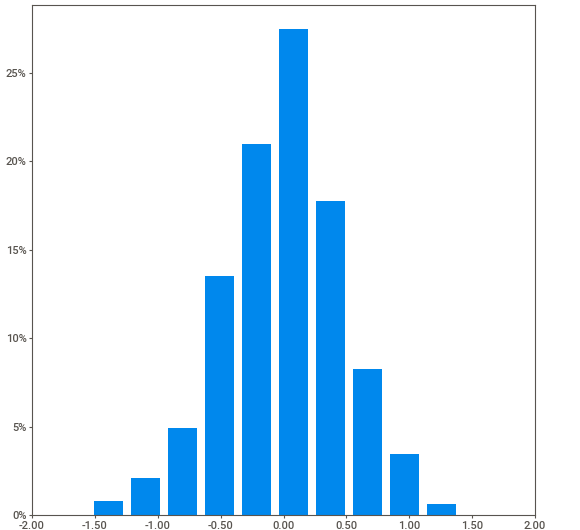
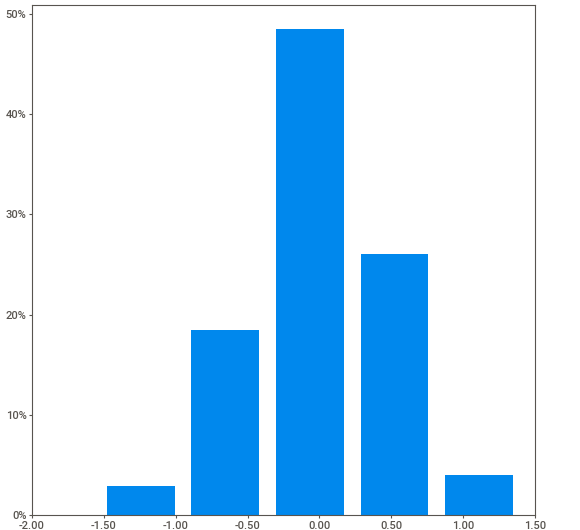
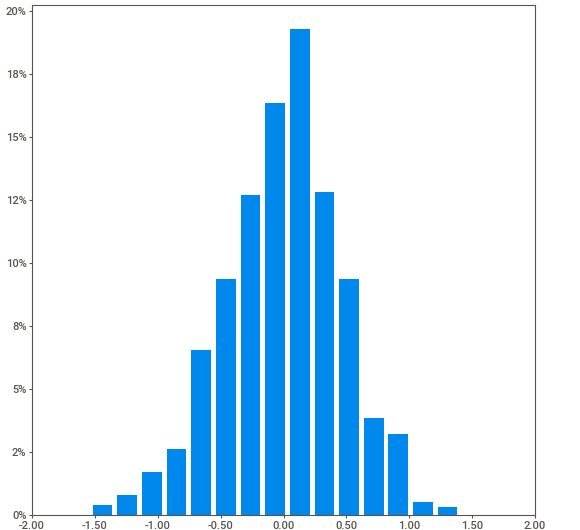
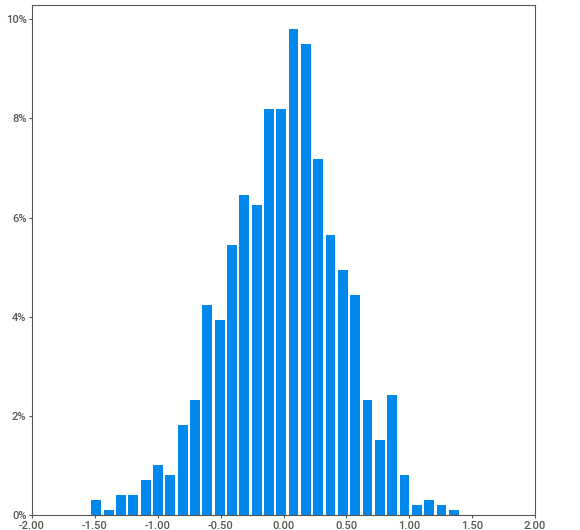
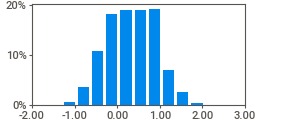
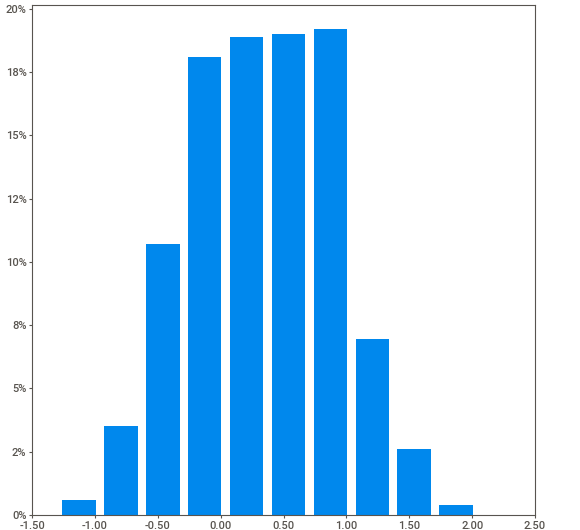
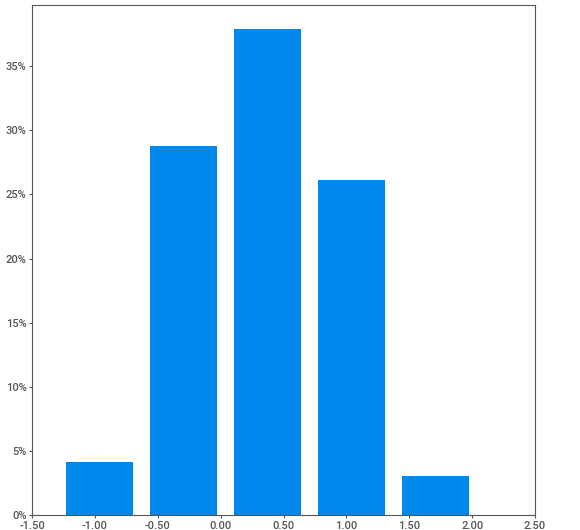
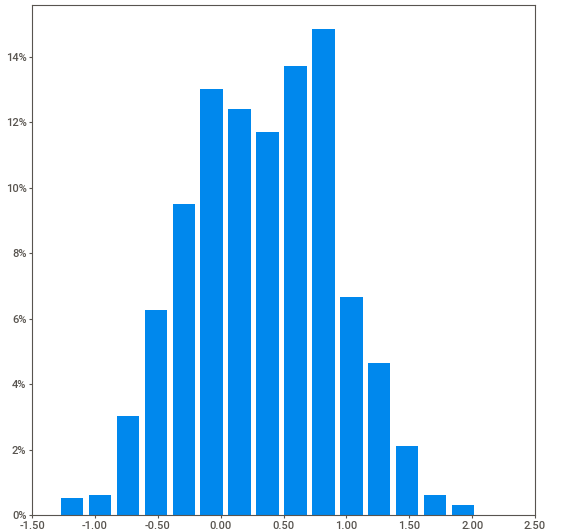
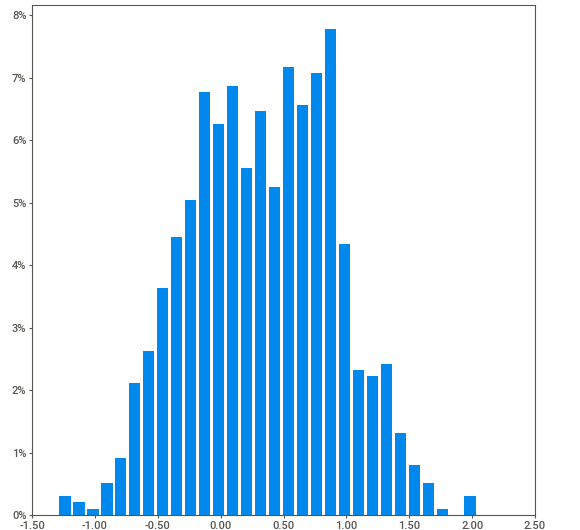
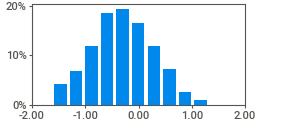
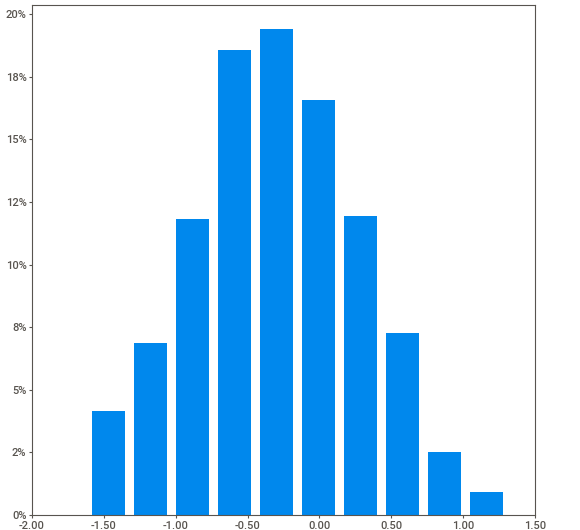
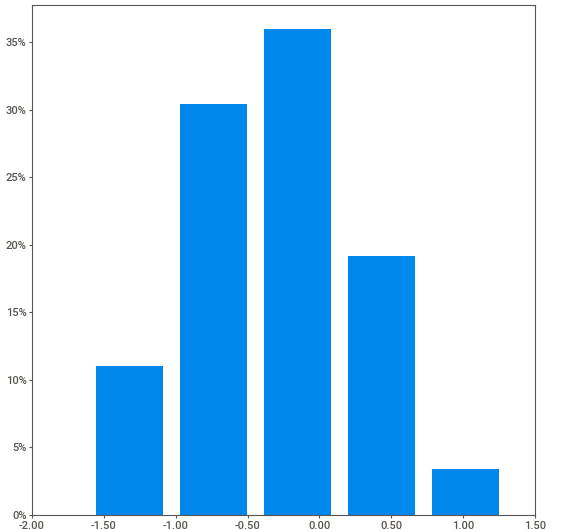
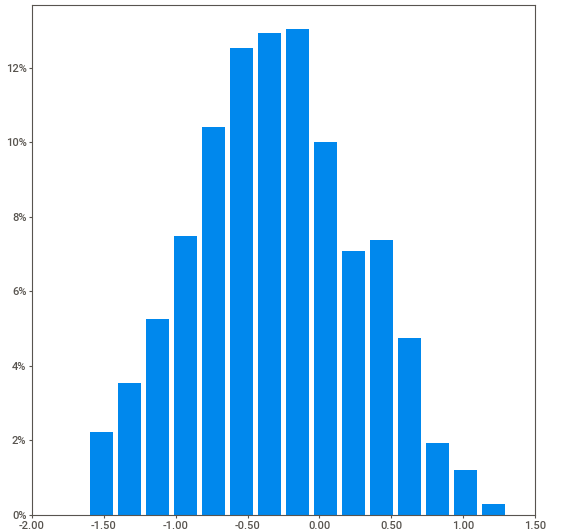
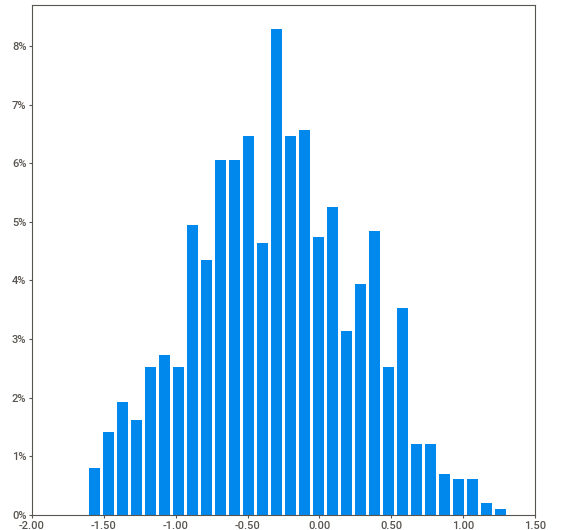
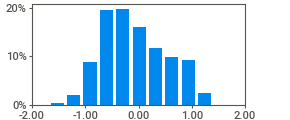
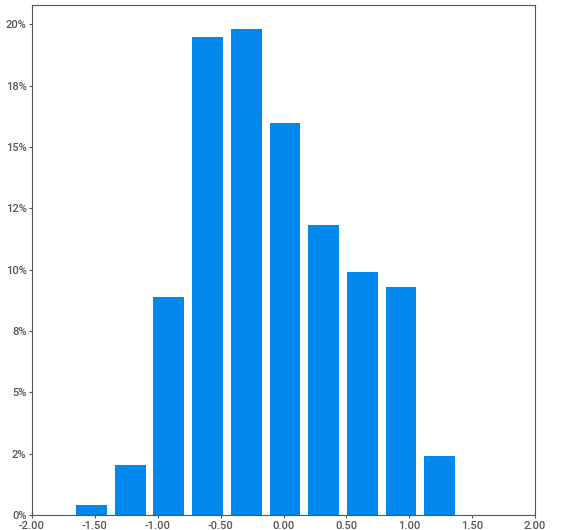
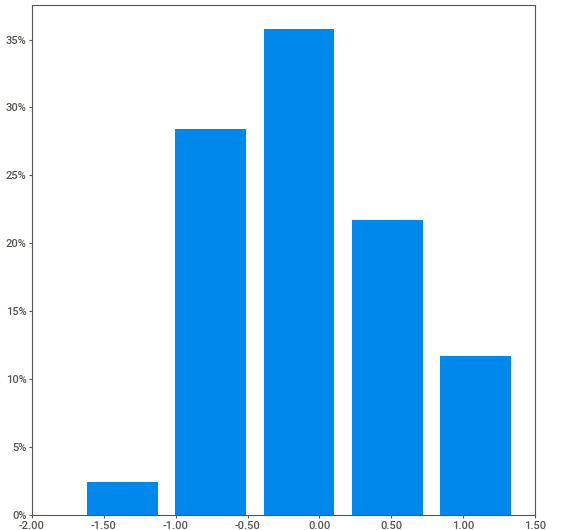
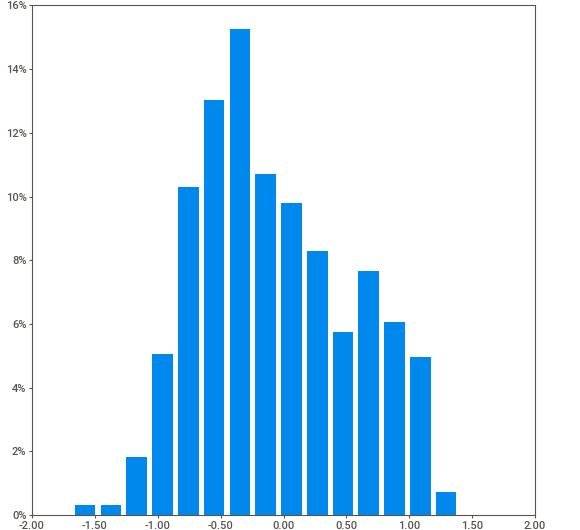
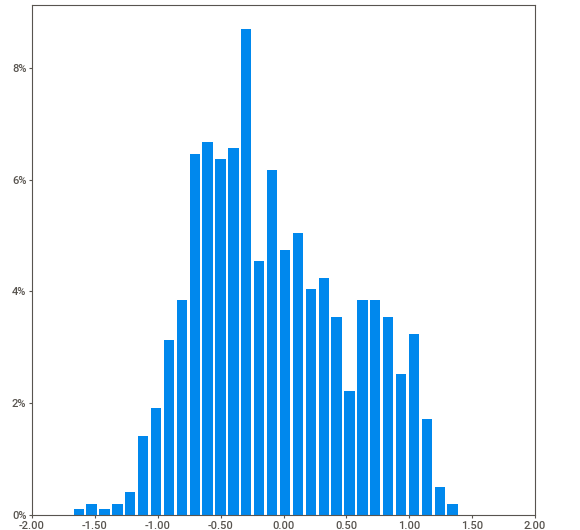
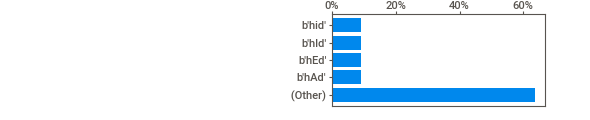
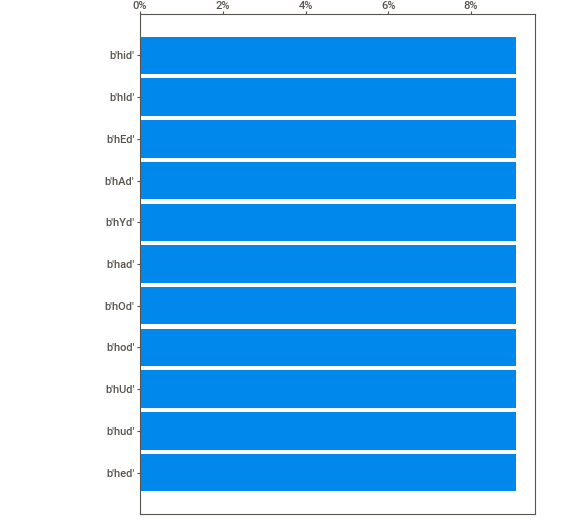
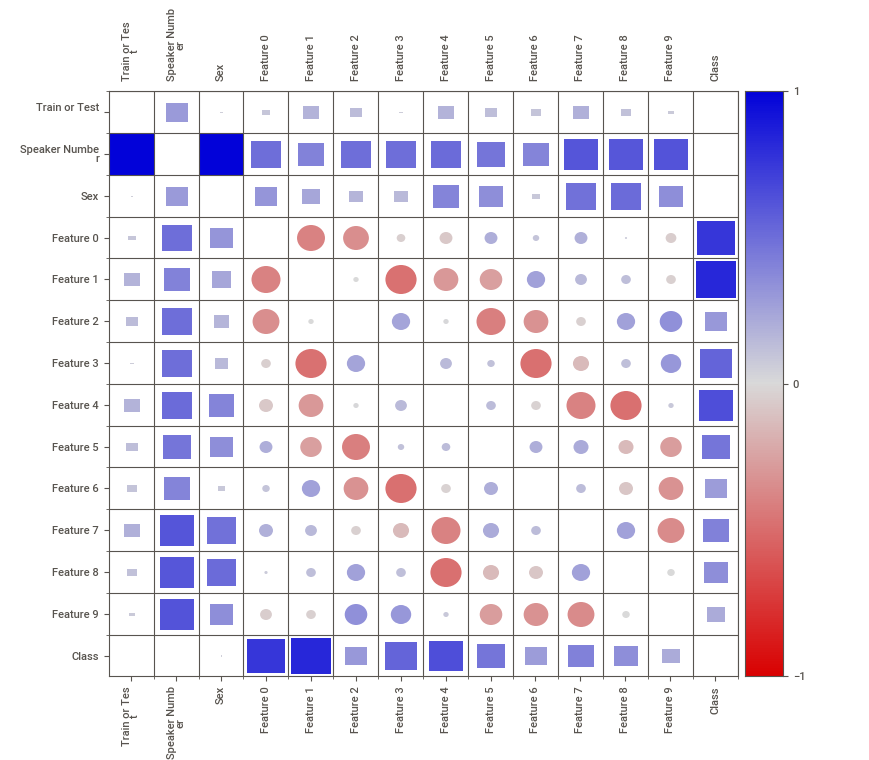
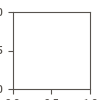

In [21]:
dataset = "vowel.arff.txt"
mpl = MLPClassifier()
Data_Set = arff.loadarff(dataset)
Data_set_df = pd.DataFrame(Data_Set[0]) #Jake, always do the [0]
report = sv.analyze(Data_set_df)
report.show_notebook()



* Baseline Accuracy for Iris: 1/3 (specific class/ # total classes)
* Baseline Accuracy for Vowel: 1/11 (specific class/ # total classes)


* The vowel dataset is going to be less accurate because it has more classes and features than the Iris dataset. The vowel dataset is much more complex.

* I would drop the sex, train/test, and/or speaker number features. They do not seem to be associated very heavily with any of the other features.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model a fair chance.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [31]:
# Train with different learning rates
drop_colums =['Train or Test', 'Speaker Number', 'Sex']
Vowel_df = Data_set_df.drop(columns=drop_colums)
Vowel_df['Class'] = Vowel_df['Class'].str.decode('utf-8')
target_column = ['Class']
X = Vowel_df.drop(columns = target_column)
y = Vowel_df['Class']
X_train,X_test, y_train, y_test = train_test_split(X, y)

In [47]:
def mlp_vowel(dataset, target_column):
  X = dataset.drop(columns = target_column)
  y = dataset[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
  MLP = MLPClassifier(hidden_layer_sizes= (2*len(X.columns),), learning_rate_init=2.00000000001, max_iter=1000)
  MLP.fit(X_train, y_train)
  soft_max = MLP.predict_proba(X_test)


  print(f'# of Iterations: {MLP.n_iter_}')
  print(f'Final Accuracy Training: {MLP.score(X_train,y_train)}')
  print(f'Test Accuracy: {soft_max[0][0]}')

mlp_vowel(Vowel_df,'Class')

# of Iterations: 30
Final Accuracy Training: 0.0876010781671159
Test Accuracy: 0.09408609225928179


*Discuss your table and the effect of different learning rates on both training time and accuracy*

|LR Value|# of Epochs|Training|Test|
|---|---|---|---|
|.01|780|0.9986522911051213|7.961032147484994e-08|
|.1|81|0.9393530997304582|1.9958841208441087e-22|
|1|35|0.09433962264150944|0.10659517824639973|
|2|43|0.09703504043126684|0.09634834574364658|
|2.00000000001|30|0.0876010781671159|0.09408609225928179|

So this was very interesting because I saw that the smallert the LR the longer it took. Well actually I expected that because its taking "tiny steps" down the gradient descent, so small steps make for a long journey. The interesting part was that if my LR was too big that it could not compute it with that rate. I think that my "step" was taking me off my slope entirely! That's pretty cool. You'll notice on my table that I did 2.0000000001 (or there's about) in order for my model to run anything bigger than 2. Pretty cool.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [59]:
# Train with different numbers of hidden nodes
def mlp_vowel_hidden(dataset, target_column):
  X = dataset.drop(columns = target_column)
  y = dataset[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
  MLP = MLPClassifier(hidden_layer_sizes= tuple([2 * len(X.columns)] * 8), learning_rate_init=.01, max_iter=1000)
  MLP.fit(X_train, y_train)
  soft_max = MLP.predict_proba(X_test)

  print(f'# of Iterations: {MLP.n_iter_}')
  print(f'Final Accuracy Training: {MLP.score(X_train,y_train)}')
  print(f'Test Accuracy: {soft_max[0][0]}')

mlp_vowel_hidden(Vowel_df, 'Class')

# of Iterations: 85
Final Accuracy Training: 0.9339622641509434
Test Accuracy: 0.00012079779447006899


*Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy*

|# of HL|# of Epochs|Training|Test|
|---|---|---|---|
|1|569|0.9973045822102425|1.4478202105731955e-15|
|2|298|1.0|7.669597411824549e-43|
|4|120|1.0|1.947994607226342e-20|
|8|85|0.9339622641509434|0.00012079779447006899|


So it only took me 8 Hidden Layers (HL) until I did not find I lost accuracy. I noticed that with more HL, the number of epochs would decrease, but so would my accuracy.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [89]:
# Train with different momentum values
def mlp_vowel_momentum(dataset, target_column):
  X = dataset.drop(columns = target_column)
  y = dataset[target_column]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
  MLP = MLPClassifier(hidden_layer_sizes= tuple([2 * len(X.columns)] * 4), learning_rate_init=0.01, max_iter=10000,
                      solver ='sgd', momentum=.99)
  MLP.fit(X_train, y_train)
  soft_max = MLP.predict_proba(X_test)


  print(f'# of Iterations: {MLP.n_iter_}')
  print(f'Final Accuracy Training: {MLP.score(X_train,y_train)}')
  print(f'Test Accuracy: {soft_max[0][0]}')

mlp_vowel_momentum(Vowel_df, 'Class')

# of Iterations: 79
Final Accuracy Training: 0.8611859838274932
Test Accuracy: 1.782689757781309e-05


|Momentum|# of Epochs|Training|Test|
|---|---|---|---|
|.7|270|0.6954177897574124|8.003934498332577e-08|
|.8|260|0.871967654986523|5.548346137846279e-05|
|.9|189|0.9487870619946092|0.004259564021369802|
|.95|112|0.8921832884097035|0.9549892490259738|
|.99|79|0.8611859838274932|1.782689757781309e-05|

*Discuss your table and the effect of momentum on both training time and accuracy*

As momentum got higher, I noticed a lower training rate and my accuracy seemed to decreased as well. I believe the momentum made it faster because it would help push the model along when it maybe got stuck in a local min; but that push would maybe push it into worse local mins.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not always blindly assume that a tool will get you the results you expect and that you may need to consider multiple approaches.

In [92]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.

from sklearn.model_selection import GridSearchCV
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':(.01, .001), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([2], [4]),
              'momentum':(0.9, .95)}
grid = GridSearchCV(clf, parameters)
grid.fit(X,y)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [4], 'learning_rate_init': 0.01, 'momentum': 0.95}
0.4808080808080808


In [ ]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=?, scale=?), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [?], ...), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X,Y)
print(search.best_params_)
print(search.best_score_)

*Discussion and comparison of grid and randomized parameter search*

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great place to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

                                             |          | [  0%]   00:00 -> (? left)


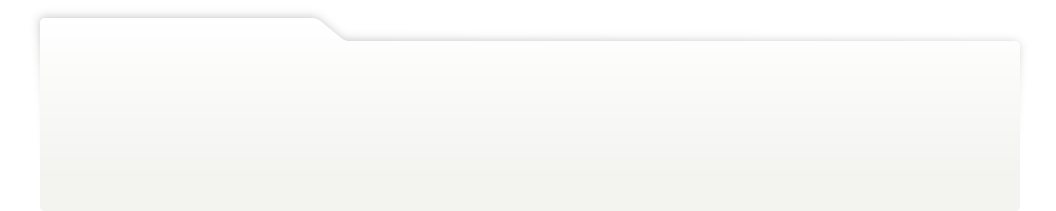
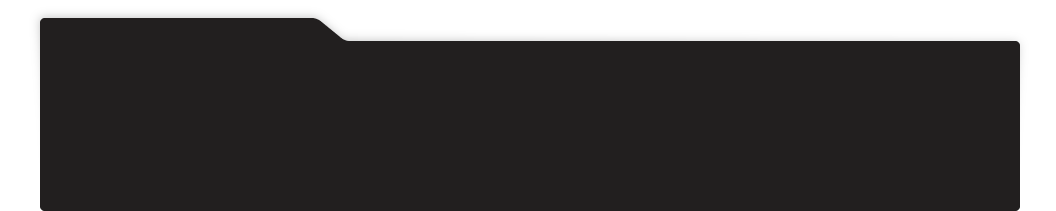
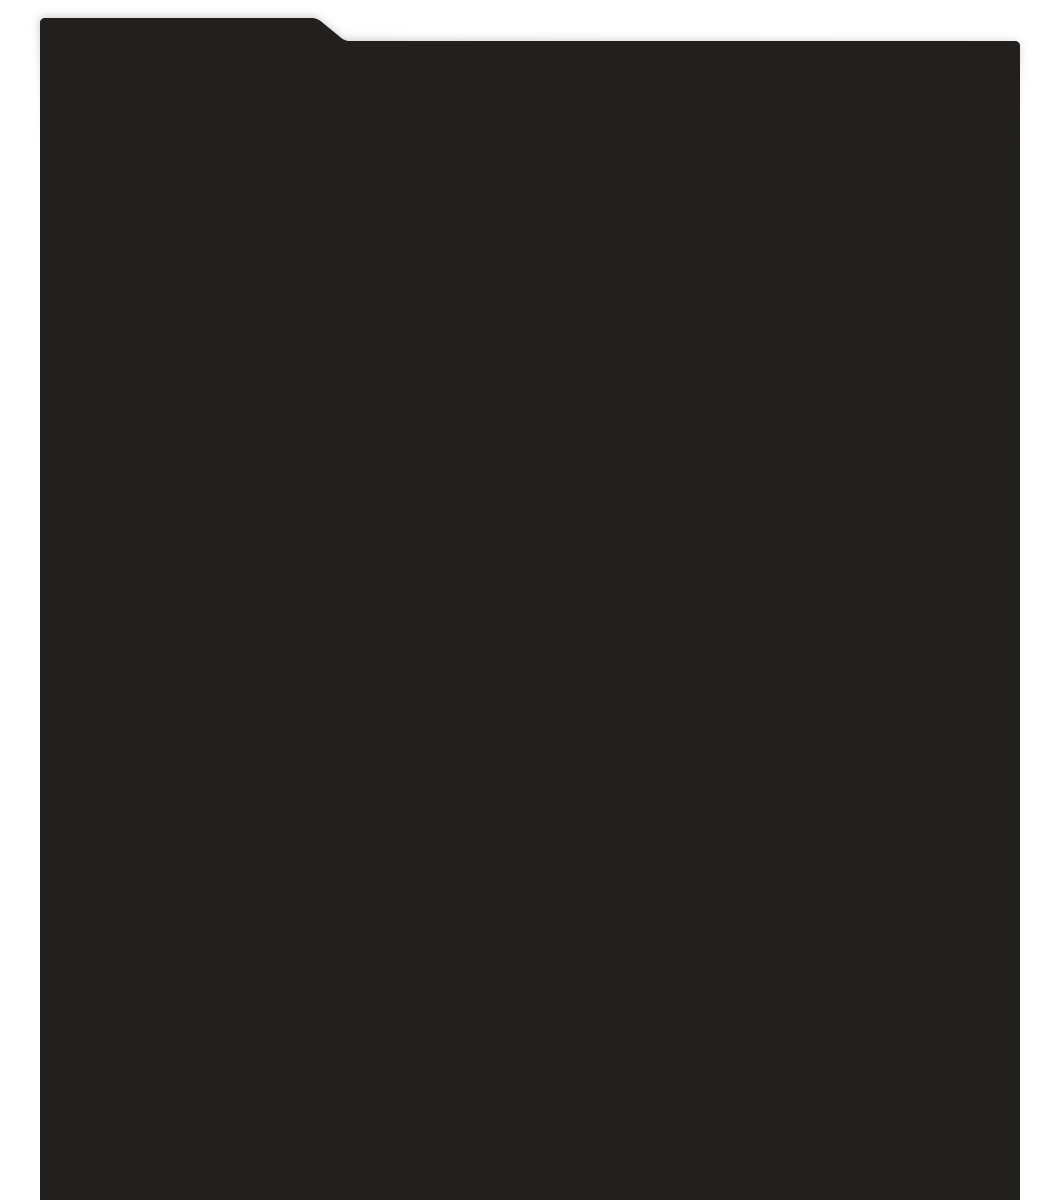
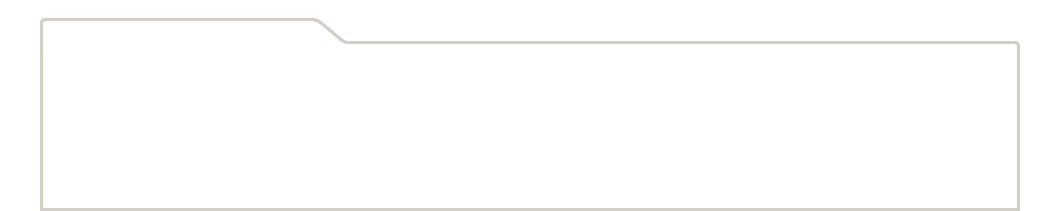
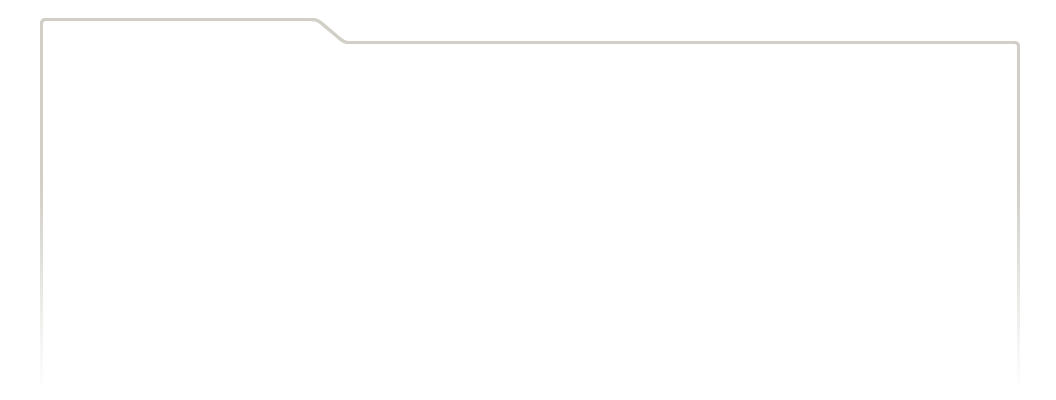
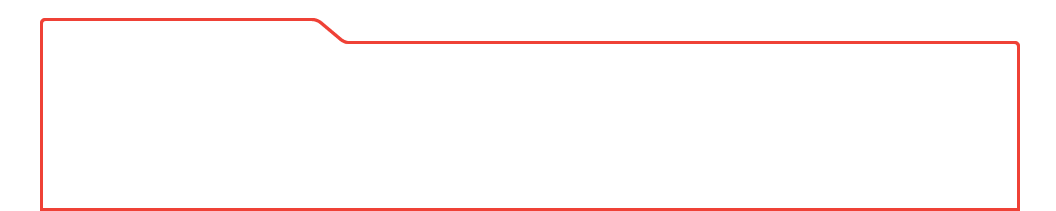
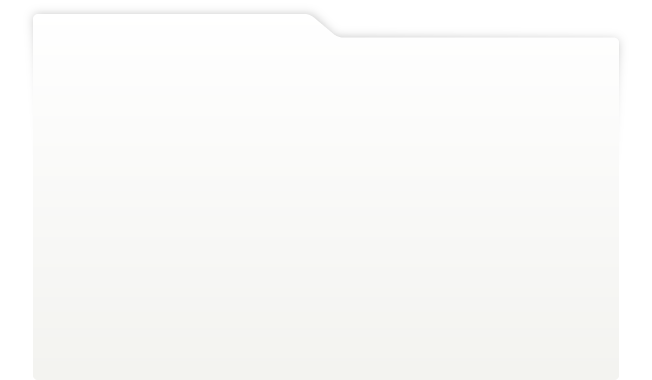
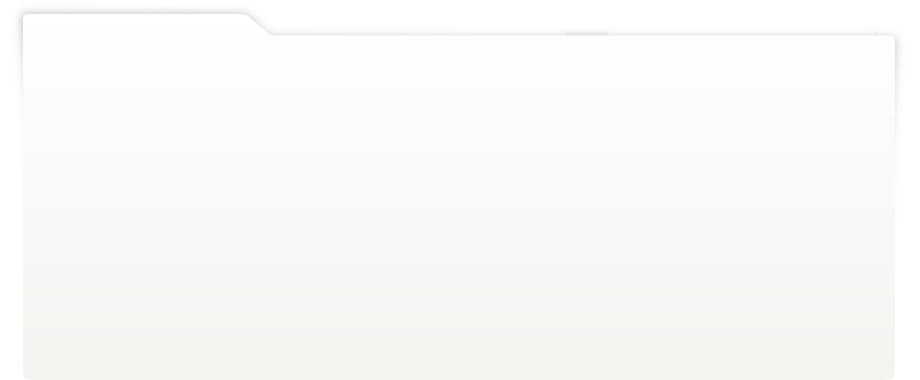
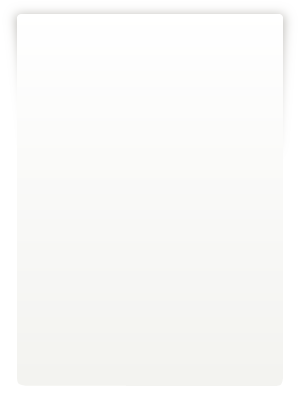
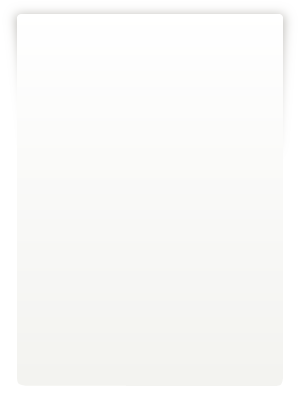
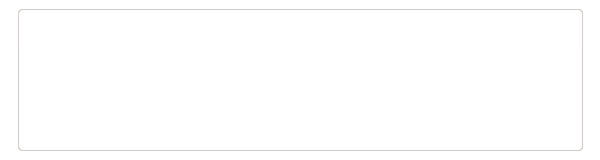
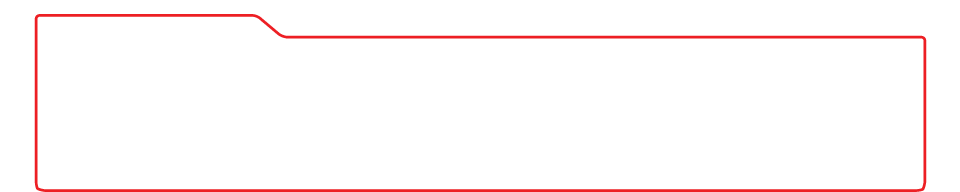
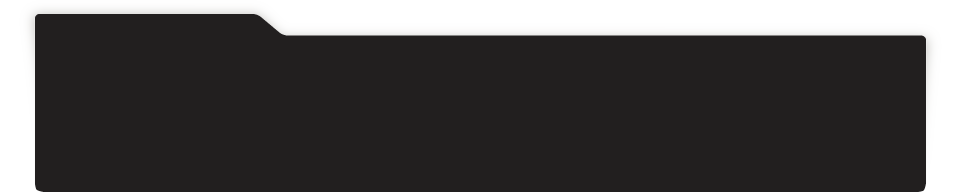
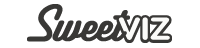
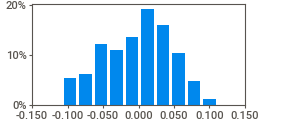
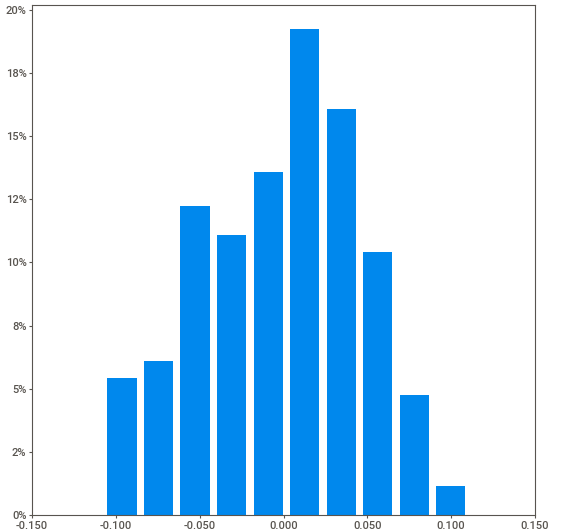
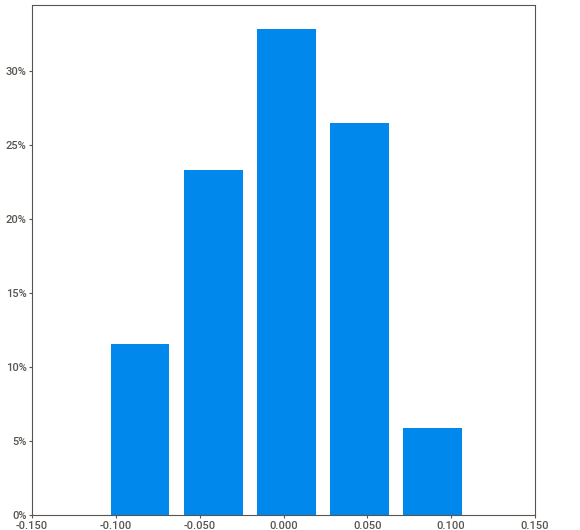
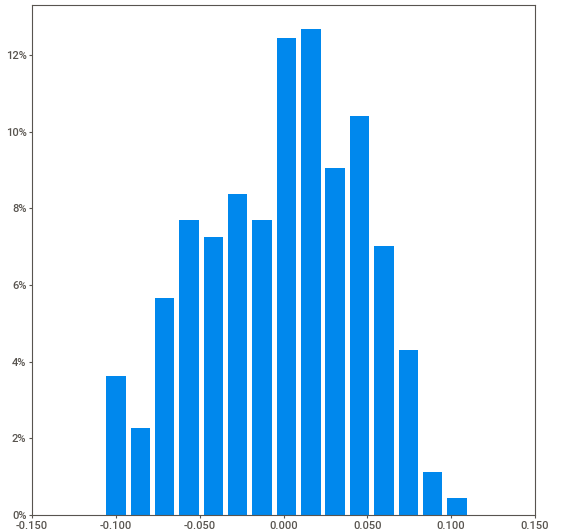
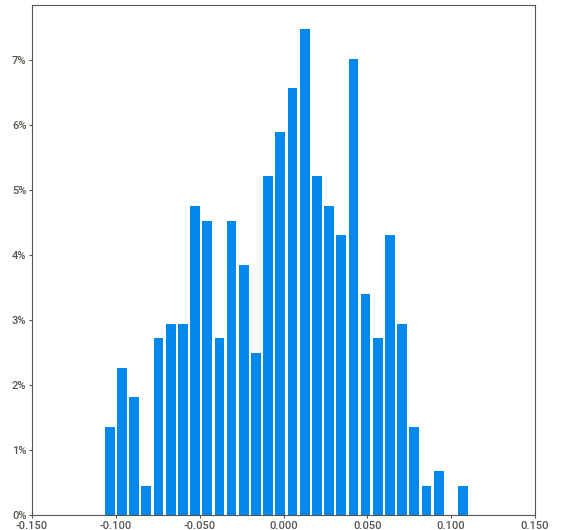
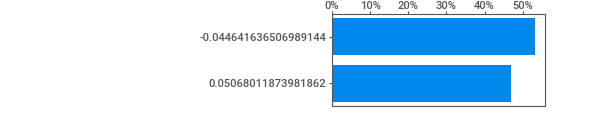
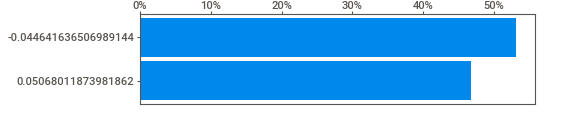
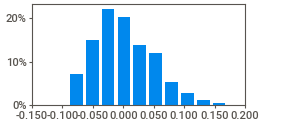
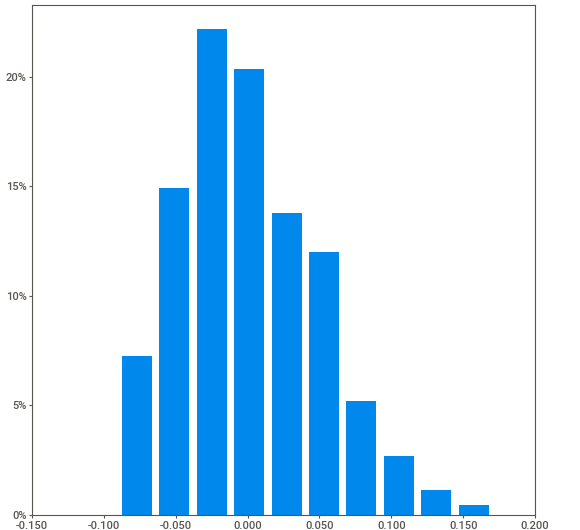
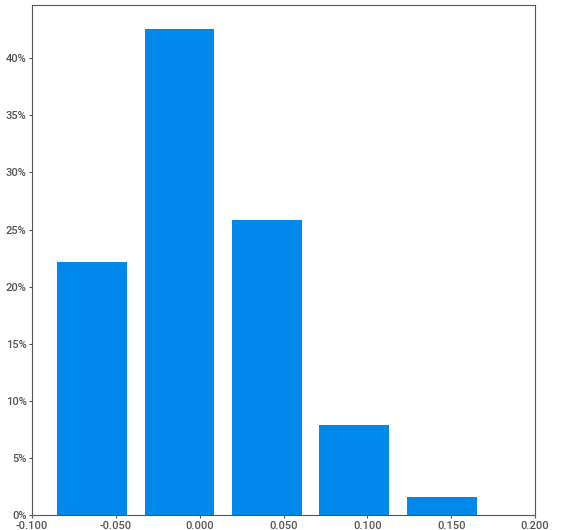
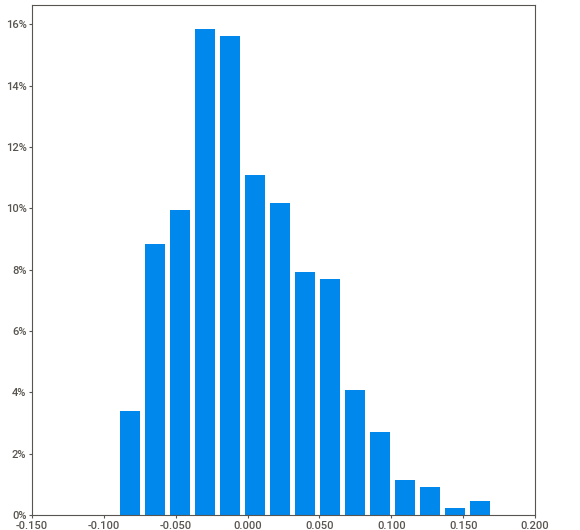
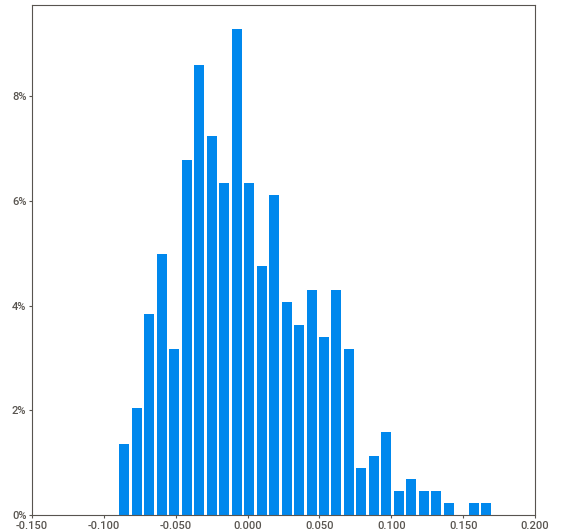
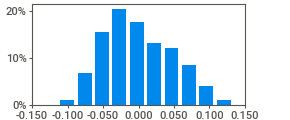
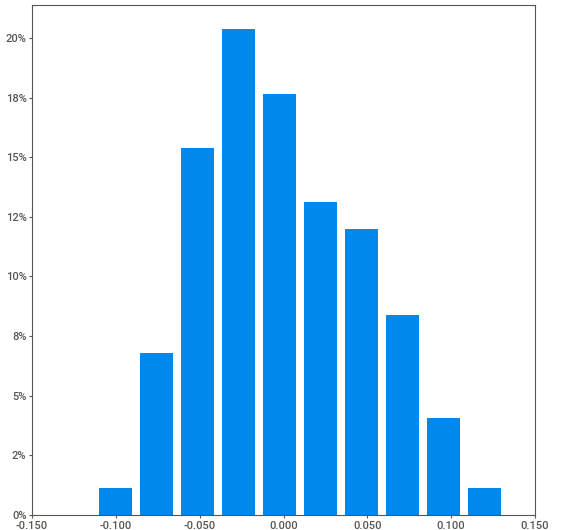
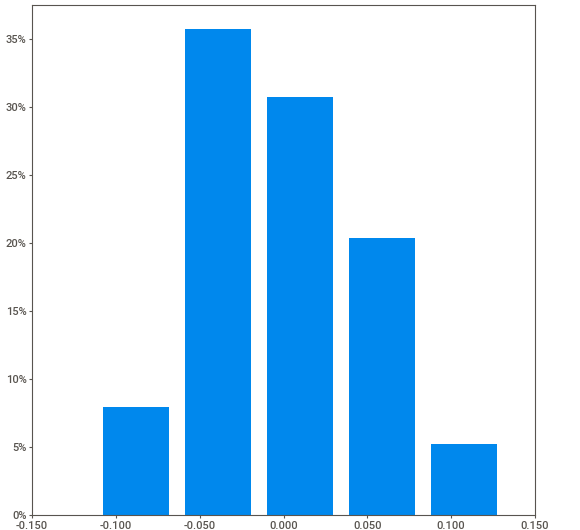
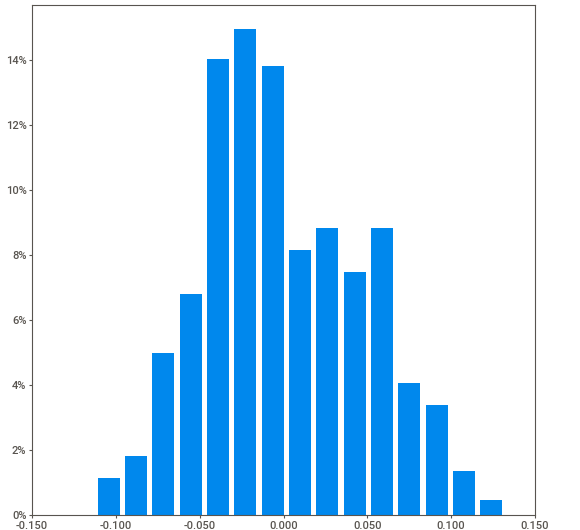
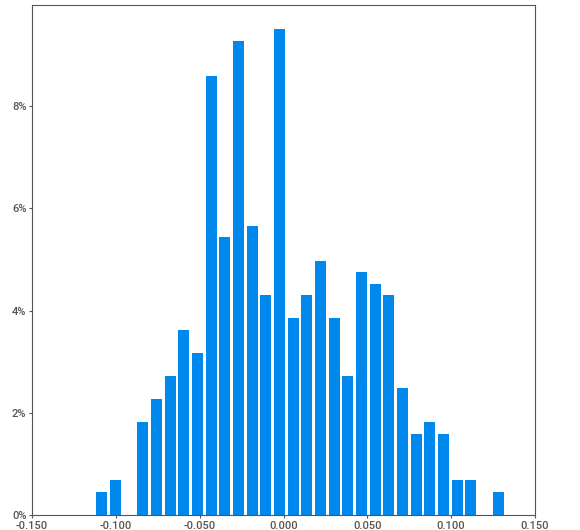
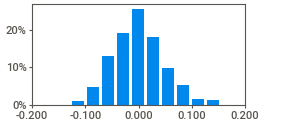
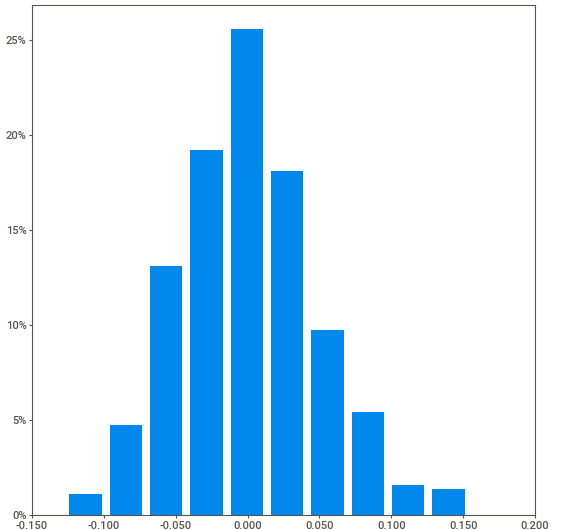
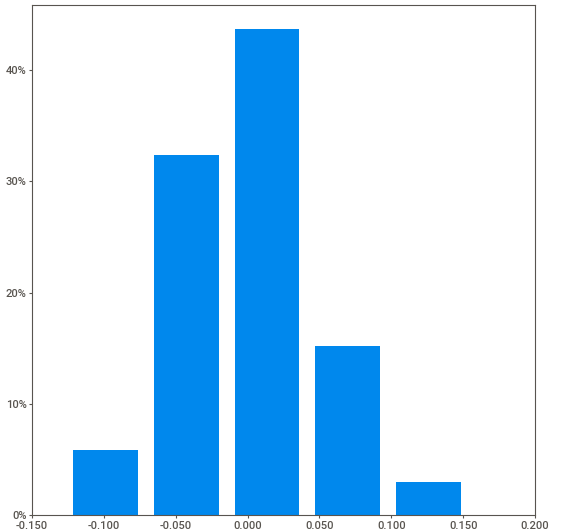
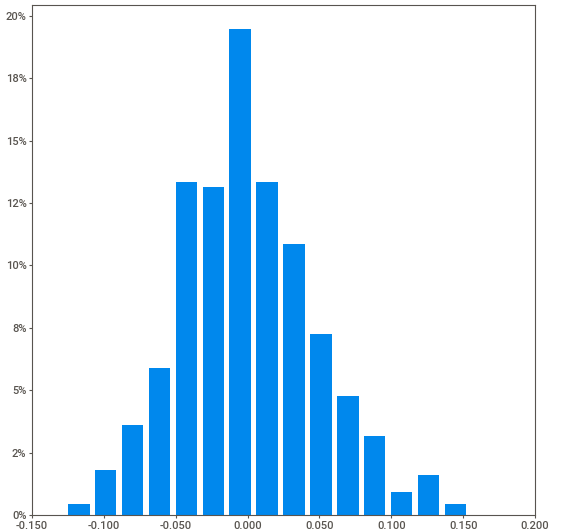
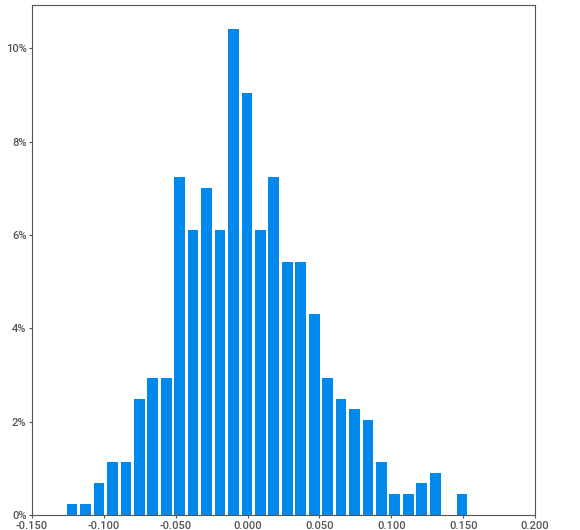
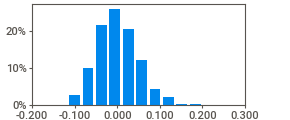
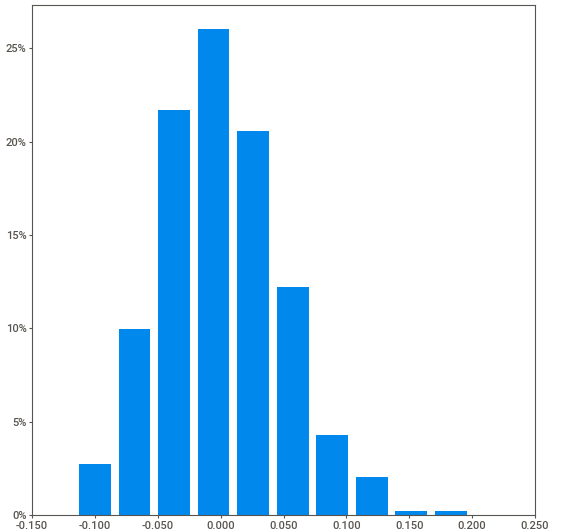
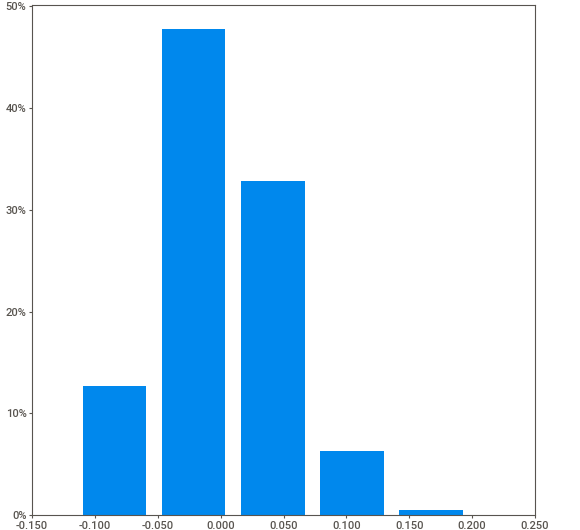
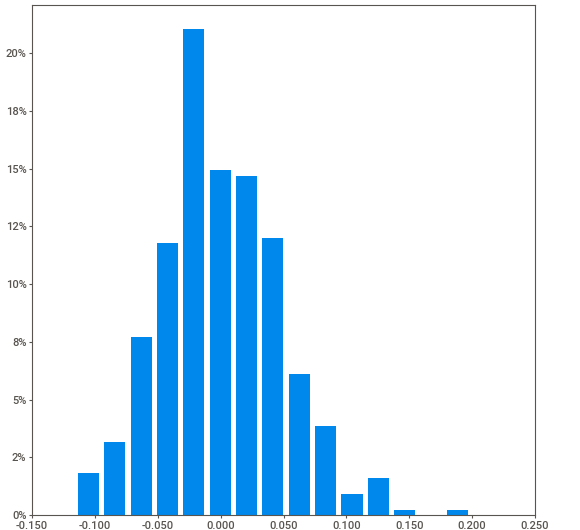
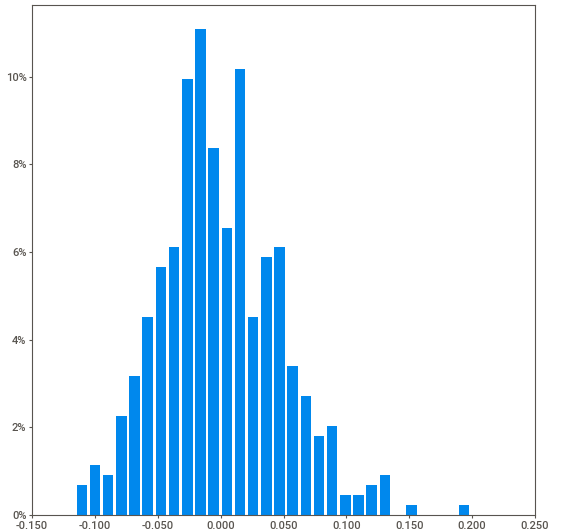
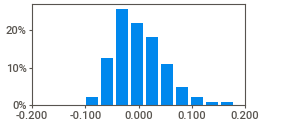
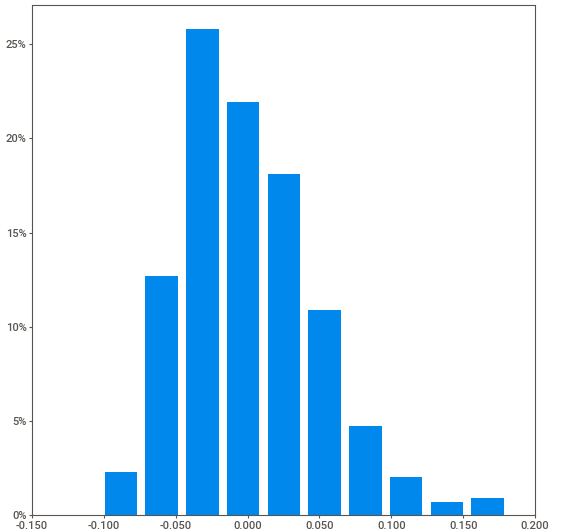
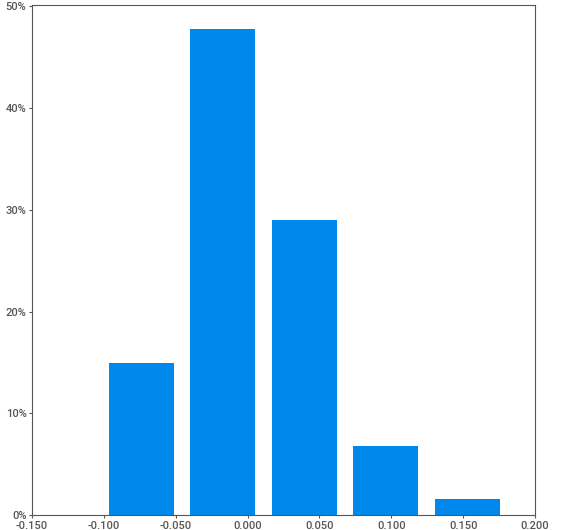
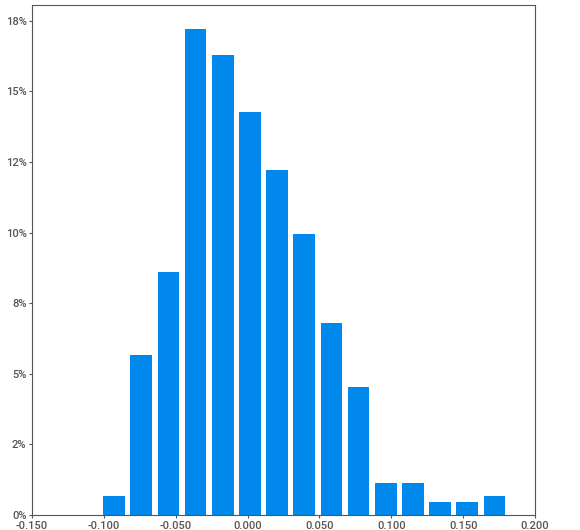
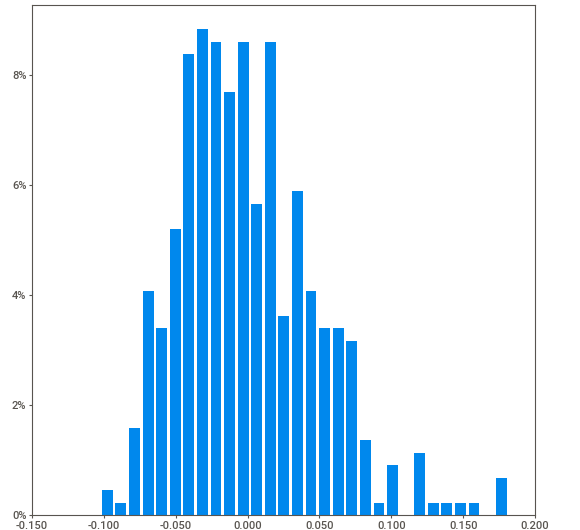
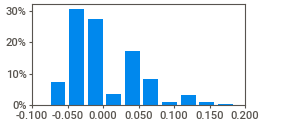
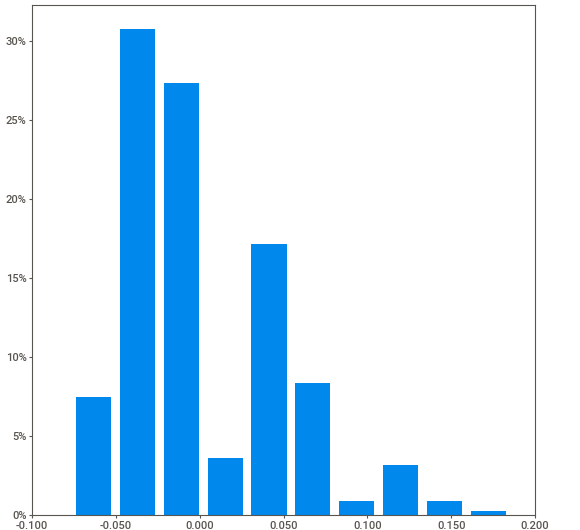
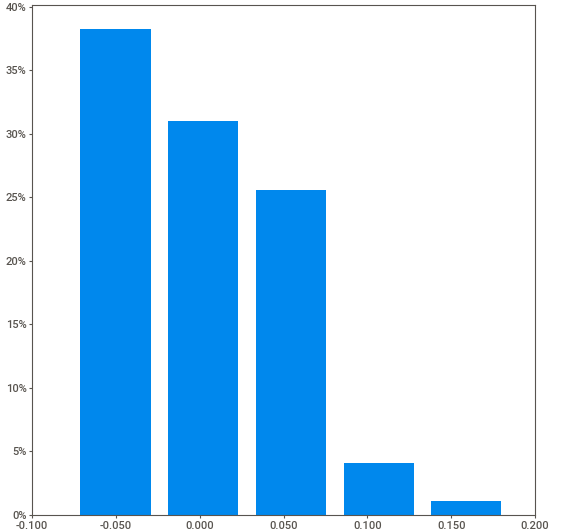
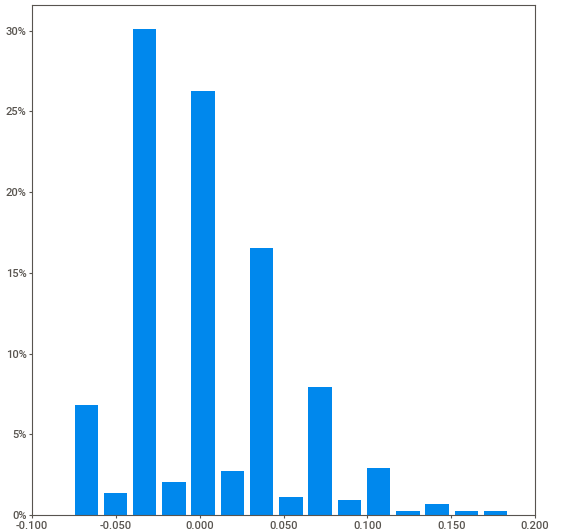
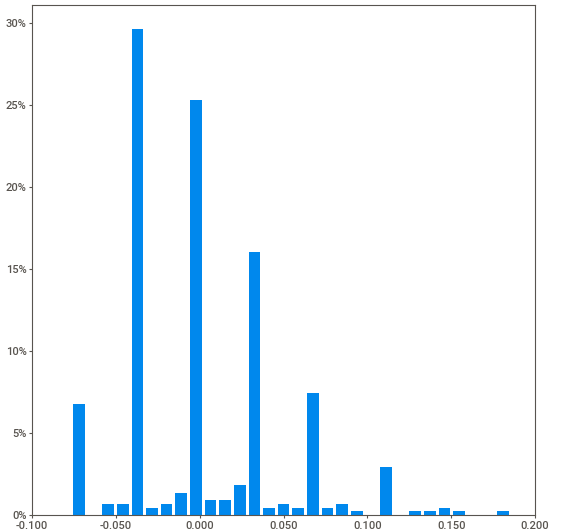
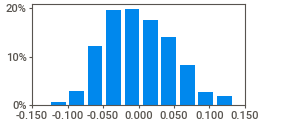
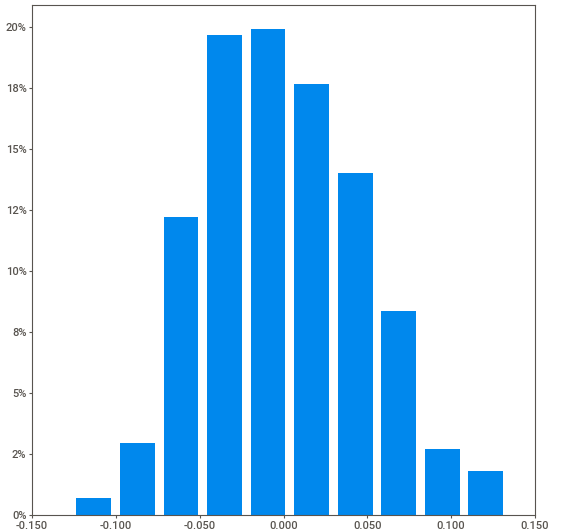
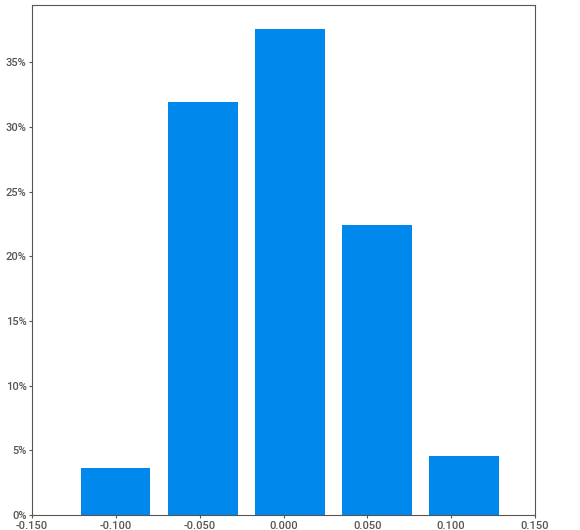
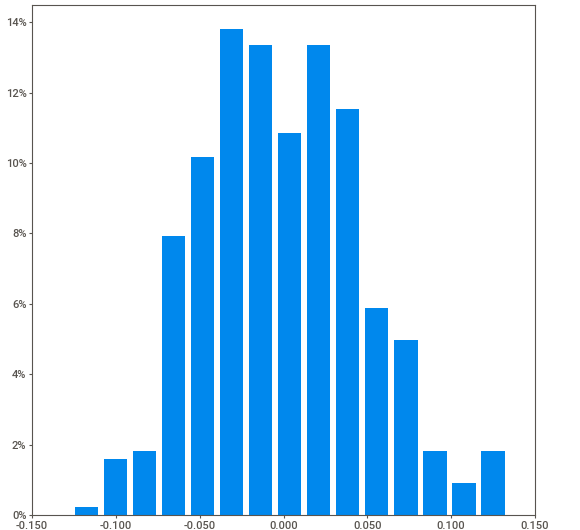
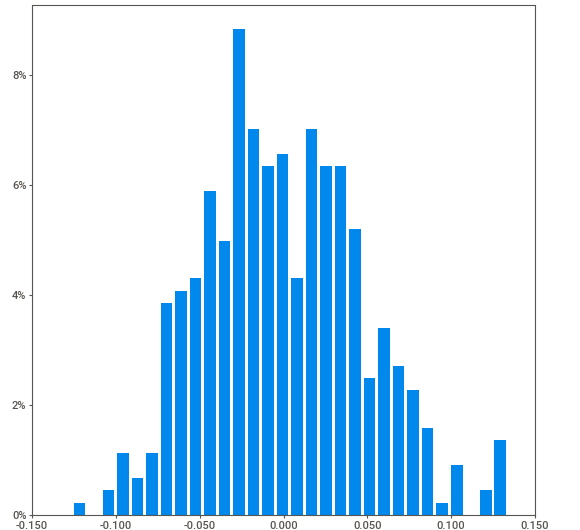
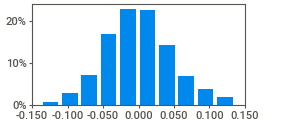
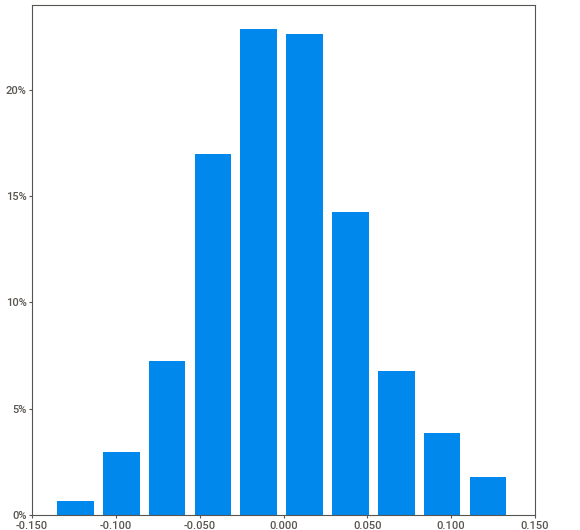
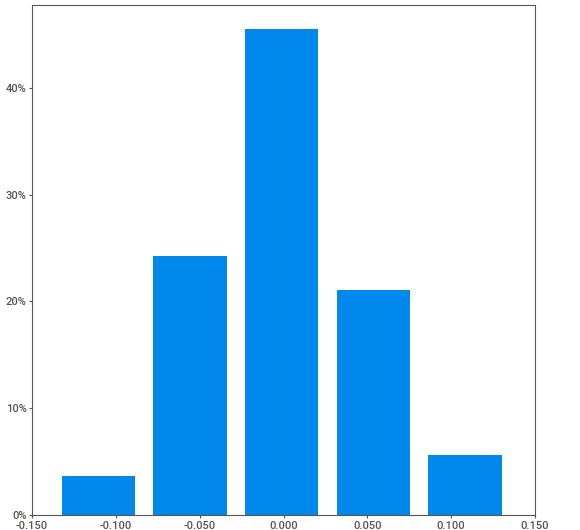
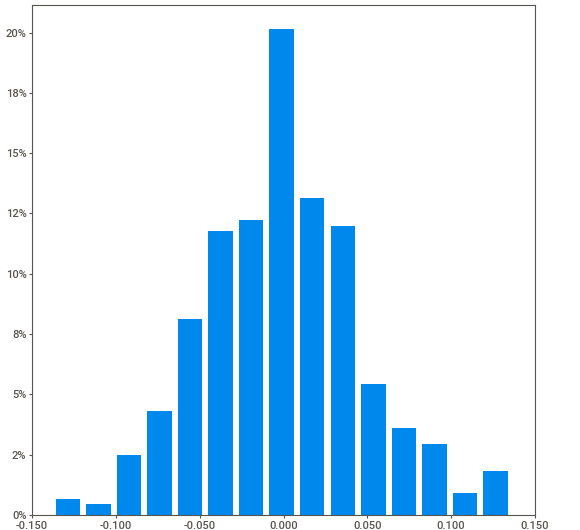
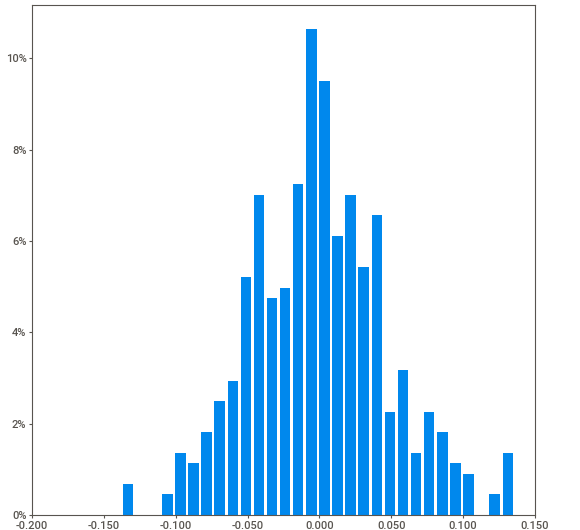
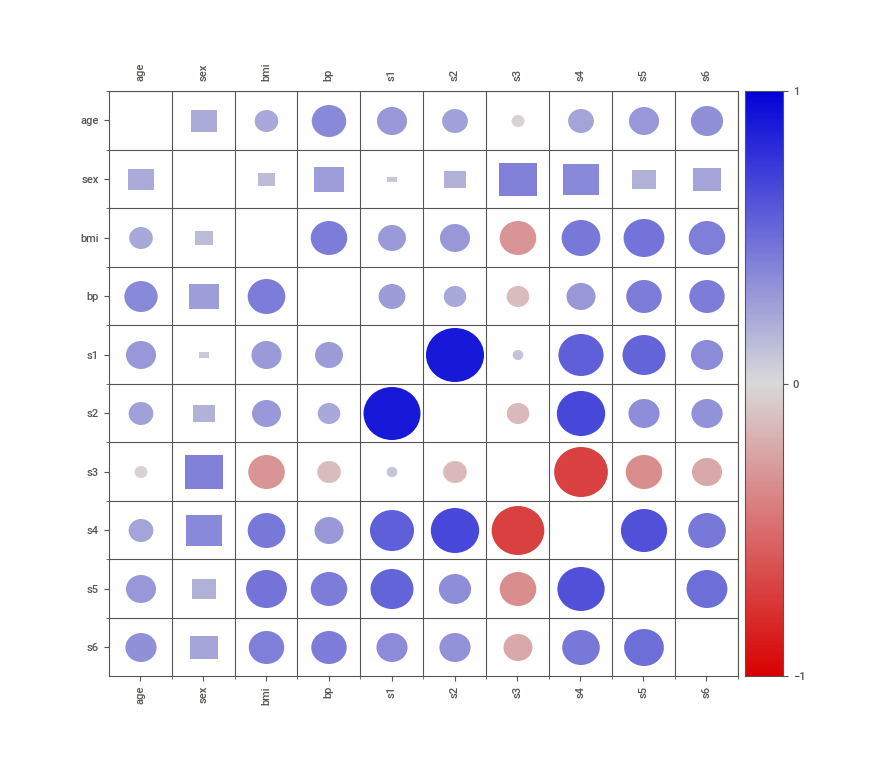
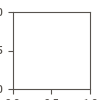

In [103]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

from sklearn.metrics import mean_absolute_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
report = sv.analyze(diabetes_df)
report.show_notebook()

In [107]:
mlp_diabetes = MLPClassifier(solver ='sgd', momentum = .9, max_iter = 1000, learning_rate_init=.01)
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target)
mlp_diabetes.fit(X_train, y_train)

MLPClassifier(learning_rate_init=0.01, max_iter=1000, solver='sgd')

In [109]:
print(mean_absolute_error(mlp_diabetes.predict(X_test), y_test))

58.486486486486484


*Discussion*

I got a MSE of 58.486. This says that the glucose levels are about 58.486 units above what the target was.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklean does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [139]:
# Run with different hyperparameters
mlp_diabetes = MLPClassifier(solver ='lbfgs', momentum = .99, max_iter = 1000, learning_rate_init=.99, activation='relu',
                             hidden_layer_sizes= tuple([2 * len(X.columns)] * 4), batch_size = 50,
                             learning_rate = 'adaptive')
X_train, X_test, y_train, y_test = train_test_split(diabetes.data,diabetes.target)
mlp_diabetes.fit(X_train, y_train)

FloatingPointError: underflow encountered in exp

In [132]:
print(mean_absolute_error(mlp_diabetes.predict(X_test), y_test))

77.53153153153153


*Discussion*

|MSE|solver|Momentum|LR|Activation|# of HL|BS|LR Int|
|---|---|---|---|---|---|---|---|
|98.35|sgd|.99|.01|relu|4|5|adaptive|
|85.78|adam|---|.01|relu|4|5|adaptive|
|60|adam|---|.01|relu|4|10|adaptive|
|65.25|adam|---|.01|relu|4|100|adaptive|
|77.53|adam|---|.01|relu|8|10|adaptive|
|---|lbfgs|---|.99|relu|4|10|adaptive|

I found that my best MSE was my third column. Interesting I could not get the last column to run. I kept on getting an "underflow error" and not even when I increased my learning rate could I get it to work. I had a lot of fun learning with this lab and learing how the different hyperparameters affect the accuracy.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one activation function for all hidden and output nodes if you want (e.g. logistic activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening that implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
